In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
plot = pd.read_csv('MovieSummaries/plot_summaries.txt', sep='\t', skip_blank_lines=True, header=None, names=['id', 'plot'])

In [3]:
character = pd.read_csv('MovieSummaries/character.metadata.tsv', sep='\t', skip_blank_lines=True, header=None, names=['id', 'free_id', 'release_date','char_name', 'dob', 'gender', 'height', 'ethnicity', 'name', 'age', 'free_char_id1', 'free_char_id2', 'free_char_id3'])

In [4]:
movie_data = pd.read_csv('MovieSummaries/movie.metadata.tsv', sep='\t', skip_blank_lines=True, header=None, names=['id', 'free_id', 'movie_name', 'release_date', 'revenue', 'runtime', 'languages', 'countries', 'genres'])

In [5]:
movie_data.head()

,id,free_id,movie_name,release_date,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [14]:
countries = {}
usa = []
india = []

In [15]:
for index, row in movie_data.iterrows():
    for key, value in json.loads(row['countries']).items():
        if value not in countries:
            countries[value]=1
        else:
            countries[value]+=1
            
        if value == 'United States of America':
            usa.append(row['id'])
        
        if value == 'India':
            india.append(row['id'])

In [16]:
countries

{'United States of America': 34408,
 'Norway': 345,
 'United Kingdom': 7868,
 'Germany': 2393,
 'South Africa': 200,
 'Argentina': 1468,
 'Japan': 2647,
 'Turkey': 215,
 'German Democratic Republic': 322,
 'Soviet Union': 564,
 'France': 4395,
 'Italy': 3163,
 'India': 8411,
 'New Zealand': 355,
 'Mexico': 870,
 'Australia': 1114,
 'Hong Kong': 1240,
 'Netherlands': 840,
 'Denmark': 610,
 'Sweden': 657,
 'Canada': 2534,
 'Brazil': 298,
 'Switzerland': 280,
 'Poland': 382,
 'Spain': 1136,
 'South Korea': 887,
 'Hungary': 325,
 'West Germany': 647,
 'Pakistan': 189,
 'Yugoslavia': 306,
 'Algeria': 43,
 'Nepal': 43,
 'Kenya': 17,
 'England': 211,
 'Finland': 247,
 'Ireland': 287,
 'China': 645,
 'Austria': 267,
 'Philippines': 389,
 'Romania': 139,
 'Slovakia': 33,
 'Czech Republic': 240,
 'Portugal': 167,
 'Egypt': 153,
 'Czechoslovakia': 376,
 'Northern Ireland': 5,
 'Israel': 235,
 'Iceland': 80,
 'Indonesia': 124,
 'Belgium': 360,
 'Greece': 192,
 'Iraq': 18,
 'Republic of Macedonia':

In [17]:
print(len(usa))
print(len(india))

34408
8411


In [20]:
ind_textfile = open("india.txt", "w")
for element in india:
    ind_textfile.write(str(element) + "\n")
ind_textfile.close()

In [21]:
us_textfile = open("usa.txt", "w")
for element in usa:
    us_textfile.write(str(element) + "\n")
us_textfile.close()

In [122]:
{k: v for k, v in sorted(countries.items(), key=lambda item: item[1])}

{'Crime': 1,
 'Iraqi Kurdistan': 1,
 'Turkmenistan': 1,
 'Guinea-Bissau': 1,
 'Republic of China': 1,
 'Macau': 1,
 'Palestinian Territories': 1,
 'German Language': 1,
 'Ukranian SSR': 1,
 'Jordan': 2,
 'Soviet occupation zone': 2,
 'Malayalam Language': 2,
 'Isle of Man': 3,
 'Qatar': 3,
 'Zambia': 3,
 'Aruba': 3,
 'Bahrain': 3,
 'Bhutan': 4,
 'Kuwait': 4,
 'Libya': 4,
 'Ukrainian SSR': 4,
 'Guinea': 4,
 'Bahamas': 4,
 'Congo': 4,
 'Haiti': 4,
 'Northern Ireland': 5,
 'Kingdom of Italy': 5,
 'Monaco': 5,
 'Mongolia': 5,
 'Montenegro': 5,
 'Cyprus': 5,
 'Malta': 6,
 'Costa Rica': 6,
 'Uzbekistan': 7,
 'Panama': 7,
 'Uzbek SSR': 8,
 'Zimbabwe': 8,
 'Wales': 8,
 'Slovak Republic': 9,
 'Mandatory Palestine': 9,
 'Palestinian territories': 10,
 'Ethiopia': 10,
 'Jamaica': 11,
 'Georgian SSR': 12,
 'Federal Republic of Yugoslavia': 13,
 'Bolivia': 15,
 'Cameroon': 15,
 'Afghanistan': 15,
 'Kingdom of Great Britain': 16,
 'United Arab Emirates': 16,
 'Armenia': 16,
 'Kenya': 17,
 'Iraq': 18

In [125]:
len(plot) - 34408 - 8411 -7868

-8384

In [127]:
count=0

In [128]:
for k,v in countries.items():
    count+=v

In [129]:
count

86439

In [52]:
import spacy


In [53]:
nlp = spacy.load('en')

In [83]:

import spacy

doc = nlp(plot.iloc[3]['plot'])
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

The det Kid PROPN []
Lemon compound Kid PROPN []
Drop compound Kid PROPN []
Kid nsubj touting VERB [The, Lemon, Drop, ,, swindler, ,]
, punct Kid PROPN []
a det swindler NOUN []
New compound York PROPN []
York compound City PROPN [New]
City compound swindler NOUN [York]
swindler appos Kid PROPN [a, City]
, punct Kid PROPN []
is aux touting VERB []
illegally advmod touting VERB []
touting ROOT touting VERB [Kid, is, illegally, horses, at, .]
horses dobj touting VERB []
at prep touting VERB [racetrack]
a det racetrack NOUN []
Florida compound racetrack NOUN []
racetrack pobj at ADP [a, Florida]
. punct touting VERB []
After prep comes VERB [hustles]
several amod hustles NOUN []
successful amod hustles NOUN []
hustles pobj After ADP [several, successful]
, punct comes VERB []
the det Kid PROPN []
Kid nsubj comes VERB [the]
comes ROOT comes VERB [After, ,, Kid, across, .]
across prep comes VERB [woman]
a det woman NOUN []
beautiful amod woman NOUN [,, but, gullible]
, punct beautiful ADJ [

and cc deserted ADJ []
money conj deserted ADJ [ ]
   money NOUN []
gone conj deserted ADJ []
. punct learns VERB []
Clued advcl pay VERB [in, by]
in prep Clued VERB []
by agent Clued VERB [footprints]
oversized amod footprints NOUN []
Oxford compound footprints NOUN []
footprints pobj by ADP [oversized, Oxford, in]
in prep footprints NOUN [snow]
the det snow NOUN []
snow pobj in ADP [the]
, punct pay VERB []
the det Kid PROPN []
Kid nsubj pay VERB [the, and, friends]
and cc Kid PROPN []
his poss friends NOUN []
friends conj Kid PROPN [his]
pay ROOT pay VERB [Clued, ,, Kid, Charley, visit, .]
Charley dative pay VERB []
a det visit NOUN []
visit dobj pay VERB [a]
. punct pay VERB []
Here advmod reveals VERB []
, punct reveals VERB []
Charley nsubj reveals VERB []
reveals ROOT reveals VERB [Here, ,, Charley, nature, through, .]
the det nature NOUN []
true amod nature NOUN []
nature dobj reveals VERB [the, true, of]
of prep nature NOUN [scheme]
the det Kid PROPN []
Kid poss scheme NOUN [t

In [25]:
from nltk.parse.stanford import StanfordDependencyParser
from nltk.parse.corenlp import CoreNLPDependencyParser

In [31]:
dep_parser=CoreNLPDependencyParser(url='http://localhost:9000')

In [64]:
parse, = dep_parser.raw_parse(plot.iloc[1]['plot'])

In [56]:
print(parse.to_conll(10))

1	Shlykov	Shlykov	NNP	NNP	_	15	nsubj	_	_
2	,	,	,	,	_	1	punct	_	_
3	a	a	DT	DT	_	8	det	_	_
4	hard	hard	JJ	JJ	_	6	dep	_	_
5	-	-	HYPH	HYPH	_	6	punct	_	_
6	working	work	VBG	VBG	_	8	amod	_	_
7	taxi	taxi	NN	NN	_	8	compound	_	_
8	driver	driver	NN	NN	_	1	appos	_	_
9	and	and	CC	CC	_	10	cc	_	_
10	Lyosha	Lyosha	NNP	NNP	_	8	conj	_	_
11	,	,	,	,	_	1	punct	_	_
12	a	a	DT	DT	_	13	det	_	_
13	saxophonist	saxophonist	NN	NN	_	1	appos	_	_
14	,	,	,	,	_	1	punct	_	_
15	develop	develop	VB	VB	_	0	ROOT	_	_
16	a	a	DT	DT	_	21	det	_	_
17	bizarre	bizarre	JJ	JJ	_	21	amod	_	_
18	love	love	NN	NN	_	20	compound	_	_
19	-	-	HYPH	HYPH	_	20	punct	_	_
20	hate	hate	NN	NN	_	21	compound	_	_
21	relationship	relationship	NN	NN	_	15	obj	_	_
22	,	,	,	,	_	15	punct	_	_
23	and	and	CC	CC	_	28	cc	_	_
24	despite	despite	IN	IN	_	26	case	_	_
25	their	they	PRP$	PRP$	_	26	nmod:poss	_	_
26	prejudices	prejudice	NNS	NNS	_	28	obl	_	_
27	,	,	,	,	_	28	punct	_	_
28	realize	realize	VBP	VBP	_	15	conj	_	_
29	they	they	PRP	PRP	_	33	nsubj	_	_
30	are	be	VBP

In [62]:
print ([parse.tree() for parse in dep_parser.raw_parse(plot.iloc[1]['plot'])])

[Tree('consists', [Tree('nation', ['The', Tree('Panem', ['of'])]), Tree('Capitol', ['of', 'a', 'wealthy', Tree('districts', ['and', 'twelve', 'poorer']), '.', Tree('provide', [Tree('punishment', ['As', Tree('rebellion', ['for', 'a', 'past'])]), ',', Tree('district', ['each']), 'must', Tree('boy', ['a', Tree('girl', ['and'])]), Tree('ages', ['between', 'the', Tree('12', ['of', Tree('18', ['and'])]), Tree('selected', [Tree('lottery', ['by']), Tree('Games', ['for', 'the', 'annual', 'Hunger'])])]), '.', Tree('fight', [Tree('tributes', ['The']), 'must', Tree('death', ['to', 'the']), Tree('arena', ['in', 'an'])])]), ';', Tree('rewarded', [Tree('survivor', ['the', 'sole']), 'is', Tree('fame', ['with', Tree('wealth', ['and'])]), '.', Tree('chosen', [Tree('Reaping', ['In', 'her', 'first', ',', Tree('Everdeen', [Tree('old', [Tree('year', ['12', '-']), '-']), 'Primrose'])]), 'is', Tree('District', ['from', '12'])])]), '.', Tree('taken', [Tree('sister', ['Her', 'older', Tree('volunteers', ['Katnis

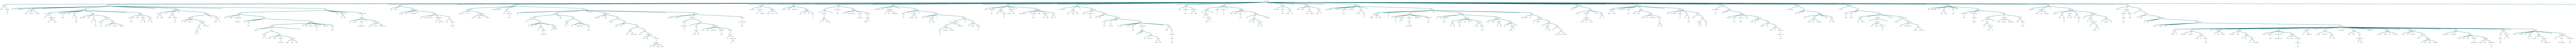

In [65]:
parse.tree()

In [77]:
from nltk.stem.wordnet import WordNetLemmatizer
from spacy.lang.en import English

SUBJECTS = ["nsubj", "nsubjpass", "csubj", "csubjpass", "agent", "expl"]
OBJECTS = ["dobj", "dative", "attr", "oprd"]
ADJECTIVES = ["acomp", "advcl", "advmod", "amod", "appos", "nn", "nmod", "ccomp", "complm",
              "hmod", "infmod", "xcomp", "rcmod", "poss"," possessive"]
COMPOUNDS = ["compound"]
PREPOSITIONS = ["prep"]

def getSubsFromConjunctions(subs):
    moreSubs = []
    for sub in subs:
        # rights is a generator
        rights = list(sub.rights)
        rightDeps = {tok.lower_ for tok in rights}
        if "and" in rightDeps:
            moreSubs.extend([tok for tok in rights if tok.dep_ in SUBJECTS or tok.pos_ == "NOUN"])
            if len(moreSubs) > 0:
                moreSubs.extend(getSubsFromConjunctions(moreSubs))
    return moreSubs

def getObjsFromConjunctions(objs):
    moreObjs = []
    for obj in objs:
        # rights is a generator
        rights = list(obj.rights)
        rightDeps = {tok.lower_ for tok in rights}
        if "and" in rightDeps:
            moreObjs.extend([tok for tok in rights if tok.dep_ in OBJECTS or tok.pos_ == "NOUN"])
            if len(moreObjs) > 0:
                moreObjs.extend(getObjsFromConjunctions(moreObjs))
    return moreObjs

def getVerbsFromConjunctions(verbs):
    moreVerbs = []
    for verb in verbs:
        rightDeps = {tok.lower_ for tok in verb.rights}
        if "and" in rightDeps:
            moreVerbs.extend([tok for tok in verb.rights if tok.pos_ == "VERB"])
            if len(moreVerbs) > 0:
                moreVerbs.extend(getVerbsFromConjunctions(moreVerbs))
    return moreVerbs

def findSubs(tok):
    head = tok.head
    while head.pos_ != "VERB" and head.pos_ != "NOUN" and head.head != head:
        head = head.head
    if head.pos_ == "VERB":
        subs = [tok for tok in head.lefts if tok.dep_ == "SUB"]
        if len(subs) > 0:
            verbNegated = isNegated(head)
            subs.extend(getSubsFromConjunctions(subs))
            return subs, verbNegated
        elif head.head != head:
            return findSubs(head)
    elif head.pos_ == "NOUN":
        return [head], isNegated(tok)
    return [], False

def isNegated(tok):
    negations = {"no", "not", "n't", "never", "none"}
    for dep in list(tok.lefts) + list(tok.rights):
        if dep.lower_ in negations:
            return True
    return False

def findSVs(tokens):
    svs = []
    verbs = [tok for tok in tokens if tok.pos_ == "VERB"]
    for v in verbs:
        subs, verbNegated = getAllSubs(v)
        if len(subs) > 0:
            for sub in subs:
                svs.append((sub.orth_, "!" + v.orth_ if verbNegated else v.orth_))
    return svs

def getObjsFromPrepositions(deps):
    objs = []
    for dep in deps:
        if dep.pos_ == "ADP" and dep.dep_ == "prep":
            objs.extend([tok for tok in dep.rights if tok.dep_  in OBJECTS or (tok.pos_ == "PRON" and tok.lower_ == "me")])
    return objs

def getAdjectives(toks):
    toks_with_adjectives = []
    for tok in toks:
        adjs = [left for left in tok.lefts if left.dep_ in ADJECTIVES]
        adjs.append(tok)
        adjs.extend([right for right in tok.rights if tok.dep_ in ADJECTIVES])
        tok_with_adj = " ".join([adj.lower_ for adj in adjs])
        toks_with_adjectives.extend(adjs)

    return toks_with_adjectives

def getObjsFromAttrs(deps):
    for dep in deps:
        if dep.pos_ == "NOUN" and dep.dep_ == "attr":
            verbs = [tok for tok in dep.rights if tok.pos_ == "VERB"]
            if len(verbs) > 0:
                for v in verbs:
                    rights = list(v.rights)
                    objs = [tok for tok in rights if tok.dep_ in OBJECTS]
                    objs.extend(getObjsFromPrepositions(rights))
                    if len(objs) > 0:
                        return v, objs
    return None, None

def getObjFromXComp(deps):
    for dep in deps:
        if dep.pos_ == "VERB" and dep.dep_ == "xcomp":
            v = dep
            rights = list(v.rights)
            objs = [tok for tok in rights if tok.dep_ in OBJECTS]
            objs.extend(getObjsFromPrepositions(rights))
            if len(objs) > 0:
                return v, objs
    return None, None

def getAllSubs(v):
    verbNegated = isNegated(v)
    subs = [tok for tok in v.lefts if tok.dep_ in SUBJECTS and tok.pos_ != "DET"]
    if len(subs) > 0:
        subs.extend(getSubsFromConjunctions(subs))
    else:
        foundSubs, verbNegated = findSubs(v)
        subs.extend(foundSubs)
    return subs, verbNegated

def getAllObjs(v):
    # rights is a generator
    rights = list(v.rights)
    objs = [tok for tok in rights if tok.dep_ in OBJECTS]
    objs.extend(getObjsFromPrepositions(rights))

    potentialNewVerb, potentialNewObjs = getObjFromXComp(rights)
    if potentialNewVerb is not None and potentialNewObjs is not None and len(potentialNewObjs) > 0:
        objs.extend(potentialNewObjs)
        v = potentialNewVerb
    if len(objs) > 0:
        objs.extend(getObjsFromConjunctions(objs))
    return v, objs

def getAllObjsWithAdjectives(v):
    # rights is a generator
    rights = list(v.rights)
    objs = [tok for tok in rights if tok.dep_ in OBJECTS]

    if len(objs)== 0:
        objs = [tok for tok in rights if tok.dep_ in ADJECTIVES]

    objs.extend(getObjsFromPrepositions(rights))

    potentialNewVerb, potentialNewObjs = getObjFromXComp(rights)
    if potentialNewVerb is not None and potentialNewObjs is not None and len(potentialNewObjs) > 0:
        objs.extend(potentialNewObjs)
        v = potentialNewVerb
    if len(objs) > 0:
        objs.extend(getObjsFromConjunctions(objs))
    return v, objs

def findSVOs(tokens):
    svos = []
    verbs = [tok for tok in tokens if tok.pos_ == "VERB" and tok.dep_ != "aux"]
    for v in verbs:
        subs, verbNegated = getAllSubs(v)
        # hopefully there are subs, if not, don't examine this verb any longer
        if len(subs) > 0:
            v, objs = getAllObjs(v)
            for sub in subs:
                for obj in objs:
                    objNegated = isNegated(obj)
                    svos.append((sub.lower_, "!" + v.lower_ if verbNegated or objNegated else v.lower_, obj.lower_))
    return svos

def findSVAOs(tokens):
    svos = []
    verbs = [tok for tok in tokens if tok.pos_ == "VERB" and tok.dep_ != "aux"]
    for v in verbs:
        subs, verbNegated = getAllSubs(v)
        # hopefully there are subs, if not, don't examine this verb any longer
        if len(subs) > 0:
            v, objs = getAllObjsWithAdjectives(v)
            for sub in subs:
                for obj in objs:
                    objNegated = isNegated(obj)
                    obj_desc_tokens = generate_left_right_adjectives(obj)
                    sub_compound = generate_sub_compound(sub)
                    svos.append((" ".join(tok.lower_ for tok in sub_compound), "!" + v.lower_ if verbNegated or objNegated else v.lower_, " ".join(tok.lower_ for tok in obj_desc_tokens)))
    return svos

def generate_sub_compound(sub):
    sub_compunds = []
    for tok in sub.lefts:
        if tok.dep_ in COMPOUNDS:
            sub_compunds.extend(generate_sub_compound(tok))
    sub_compunds.append(sub)
    for tok in sub.rights:
        if tok.dep_ in COMPOUNDS:
            sub_compunds.extend(generate_sub_compound(tok))
    return sub_compunds

def generate_left_right_adjectives(obj):
    obj_desc_tokens = []
    for tok in obj.lefts:
        if tok.dep_ in ADJECTIVES:
            obj_desc_tokens.extend(generate_left_right_adjectives(tok))
    obj_desc_tokens.append(obj)

    for tok in obj.rights:
        if tok.dep_ in ADJECTIVES:
            obj_desc_tokens.extend(generate_left_right_adjectives(tok))

    return obj_desc_tokens

In [81]:
from spacy.lang.en import English

sentence = plot.iloc[0]['plot']
parser = spacy.load('en')
parse = parser(sentence)
print(findSVAOs(parse))

[('shlykov', 'develop', 'bizarre relationship'), ('they', '!are', 'so different'), ('they', '!are', 'after all')]


In [131]:
plot.iloc[1]['plot']

'The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl  between the ages of 12 and 18 selected by lottery  for the annual Hunger Games. The tributes must fight to the death in an arena; the sole survivor is rewarded with fame and wealth. In her first Reaping, 12-year-old Primrose Everdeen is chosen from District 12. Her older sister Katniss volunteers to take her place. Peeta Mellark, a baker\'s son who once gave Katniss bread when she was starving, is the other District 12 tribute. Katniss and Peeta are taken to the Capitol, accompanied by their frequently drunk mentor, past victor Haymitch Abernathy. He warns them about the "Career" tributes who train intensively at special academies and almost always win. During a TV interview with Caesar Flickerman, Peeta unexpectedly reveals his love for Katniss. She is outraged, believing it to be a ploy to gain audience support, as "sponsors" m

In [ ]:
import pandas as pd
from pandas.core import indexing
from gender_predictor.GenderClassifier import classify_gender
from collections import defaultdict
from tqdm.notebook import tqdm
import multiprocessing as mp


def read_input_file(filename):
    data_df = pd.read_csv(filename,sep=',', skip_blank_lines=True, index_col= False)
    return data_df

#movie_id	sentence_id	 token_id	dependent	dep_pos	 dep_ner	 governor

def get_plots_by_movie_id(data_df):
    movie_ids = data_df.movie_id.unique()  
    grouped = data_df.groupby(data_df.movie_id)

    all_movie_plots = []
    for id in movie_ids:
        sents_df = grouped.get_group(id)
        all_movie_plots.append(sents_df)
    return all_movie_plots


def get_frequency_for_movie(movie):
    name_data  = movie[(movie.dep_pos == 'PRP') |  ((movie.dep_pos == 'NNP') & (movie.dep_ner == 'PERSON'))]
    for idx,name in name_data.iterrows():            
        try:
            character_name = name['dependent'].lower()
            if character_name in ['he', 'his']:
                gender = 'M'
            elif character_name in ['she', 'her']:
                gender = 'F'
            else:
                gender = classify_gender(character_name)


            governor = int(name['governor'])
            governor_df = movie[(movie['token_id'] == governor) & (movie['dep_pos']=='JJ')]
            df2 = movie[(movie['sentence_id']==name['sentence_id']) & (movie['governor'] == name['token_id'])  & (movie['dep_pos']=='JJ')]
            df3 = movie[(movie['sentence_id'] == name['sentence_id']) & (movie['governor']==name['governor']) & (movie['dep_pos']=='JJ')]
            y = pd.concat([governor_df, df2, df3])
            for i, x in y.iterrows():
                frequency_list[gender][x['dependent']] +=1
        except:
            pass
    print(frequency_list)
def get_name_and_adjective_mapping(all_movie_plots):
    frequency_list = {'M':defaultdict(int), 'F':defaultdict(int)}
    pool = mp.Pool(20)
    results = [pool.apply(get_frequencey, args=(movie,)) for movie in all_movie_plots]    
        
        
    return results


def get_adjective_cloud(filename):
    movie_data_df = read_input_file(filename)
    all_movie_plots = get_plots_by_movie_id(movie_data_df)
    name_adj_cluster_list = get_name_and_adjective_mapping(all_movie_plots)
    return name_adj_cluster_list


#get_adjective_cloud("SampleDependency.txt")


#Output is the list of dictionaries mapping name of characters to the list of its corresponding adjectives 
#[{'Rohit': ['orphans'], 'Amit': []}]

In [ ]:
x = get_adjective_cloud('india.csv')

  0%|          | 0/4752 [00:00<?, ?it/s]

Accuracy: 0.968768
Accuracy: 0.969549
Accuracy: 0.968976
Accuracy: 0.968924
Accuracy: 0.968924
Accuracy: 0.968299
Accuracy: 0.969601
Accuracy: 0.971006
Accuracy: 0.970642
Accuracy: 0.968768
Accuracy: 0.970225
Accuracy: 0.969913
Accuracy: 0.969184
Accuracy: 0.969236
Accuracy: 0.969497
Accuracy: 0.970954
Accuracy: 0.970850
Accuracy: 0.969497
Accuracy: 0.969340
Accuracy: 0.970850
Accuracy: 0.967779
Accuracy: 0.969340
Accuracy: 0.969236
Accuracy: 0.968664
Accuracy: 0.969497
Accuracy: 0.968924
Accuracy: 0.971527
Accuracy: 0.967571
Accuracy: 0.970382
Accuracy: 0.970225
{'M': defaultdict(<class 'int'>, {'successful': 1, 'future': 2, 'confused': 3, 'small': 2, 'famous': 2, 'big': 2, 'true': 2}), 'F': defaultdict(<class 'int'>, {'future': 1, 'good': 2, 'many': 1})}
Accuracy: 0.971839
Accuracy: 0.970017
Accuracy: 0.968820
Accuracy: 0.971058
Accuracy: 0.970746
Accuracy: 0.968612
Accuracy: 0.969080
Accuracy: 0.970382
Accuracy: 0.968143
Accuracy: 0.970746
Accuracy: 0.970173
Accuracy: 0.970121
Accur

Accuracy: 0.970434
Accuracy: 0.967623
Accuracy: 0.970121
Accuracy: 0.969965
Accuracy: 0.971683
Accuracy: 0.968768
Accuracy: 0.968768
Accuracy: 0.970017
Accuracy: 0.969445
Accuracy: 0.967779
Accuracy: 0.970017
Accuracy: 0.969965
Accuracy: 0.971787
Accuracy: 0.967831
Accuracy: 0.969549
Accuracy: 0.968195
Accuracy: 0.966790
Accuracy: 0.970538
Accuracy: 0.969809
Accuracy: 0.969393
Accuracy: 0.966790
Accuracy: 0.970173
{'M': defaultdict(<class 'int'>, {'successful': 1, 'future': 4, 'confused': 3, 'small': 2, 'famous': 3, 'big': 2, 'true': 4, 'formal': 1, 'married': 2, 'failed': 2, 'same': 4, 'interested': 1, 'Unnikrishnan': 6, 'mental': 3, 'female': 1, 'sincere': 4, 'green': 1, 'opposite': 4, 'many': 2, 'soft': 2, 'several': 2, 'heinous': 1, 'full': 2, 'hard': 2, 'fledged': 2, 'serious': 2, 'old': 4, 'good': 2, 'other': 6, 'mature': 2, 'different': 3, 'mad': 1, 'final': 4, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible

Accuracy: 0.968872
Accuracy: 0.969080
Accuracy: 0.969080
Accuracy: 0.969549
Accuracy: 0.968768
Accuracy: 0.969236
Accuracy: 0.968716
Accuracy: 0.969705
Accuracy: 0.970434
Accuracy: 0.968456
Accuracy: 0.970225
Accuracy: 0.967623
Accuracy: 0.971058
Accuracy: 0.969132
Accuracy: 0.967675
Accuracy: 0.971214
Accuracy: 0.968091
Accuracy: 0.970486
Accuracy: 0.970225
Accuracy: 0.969705
Accuracy: 0.969184
Accuracy: 0.970277
Accuracy: 0.970121
Accuracy: 0.968872
Accuracy: 0.971110
Accuracy: 0.968872
Accuracy: 0.969184
Accuracy: 0.969653
Accuracy: 0.970694
Accuracy: 0.967415
Accuracy: 0.969028
Accuracy: 0.970902
Accuracy: 0.971006
Accuracy: 0.966530
Accuracy: 0.970642
Accuracy: 0.970017
Accuracy: 0.969184
{'M': defaultdict(<class 'int'>, {'successful': 1, 'future': 4, 'confused': 3, 'small': 2, 'famous': 3, 'big': 2, 'true': 4, 'formal': 1, 'married': 2, 'failed': 2, 'same': 7, 'interested': 4, 'Unnikrishnan': 6, 'mental': 3, 'female': 1, 'sincere': 4, 'green': 1, 'opposite': 4, 'many': 2, 'soft':

Accuracy: 0.970798
Accuracy: 0.968508
Accuracy: 0.970694
Accuracy: 0.969913
Accuracy: 0.971058
Accuracy: 0.970902
Accuracy: 0.969445
Accuracy: 0.970017
Accuracy: 0.970590
Accuracy: 0.969288
Accuracy: 0.969288
Accuracy: 0.970954
Accuracy: 0.970590
Accuracy: 0.970277
Accuracy: 0.971943
Accuracy: 0.969236
Accuracy: 0.970434
Accuracy: 0.970121
Accuracy: 0.969288
Accuracy: 0.968404
Accuracy: 0.969809
Accuracy: 0.969445
Accuracy: 0.968508
Accuracy: 0.966686
Accuracy: 0.968976
Accuracy: 0.969184
Accuracy: 0.970642
Accuracy: 0.970017
Accuracy: 0.969236
Accuracy: 0.969080
Accuracy: 0.967467
Accuracy: 0.969965
Accuracy: 0.969653
Accuracy: 0.970277
Accuracy: 0.971266
Accuracy: 0.968404
Accuracy: 0.970277
Accuracy: 0.968299
Accuracy: 0.971683
Accuracy: 0.967362
Accuracy: 0.966998
Accuracy: 0.968247
Accuracy: 0.969913
{'M': defaultdict(<class 'int'>, {'successful': 1, 'future': 4, 'confused': 3, 'small': 2, 'famous': 3, 'big': 2, 'true': 4, 'formal': 1, 'married': 2, 'failed': 2, 'same': 7, 'intere

Accuracy: 0.967727
Accuracy: 0.968612
Accuracy: 0.971683
Accuracy: 0.969757
Accuracy: 0.968404
Accuracy: 0.969601
Accuracy: 0.968351
Accuracy: 0.968872
Accuracy: 0.968195
Accuracy: 0.968351
Accuracy: 0.970642
Accuracy: 0.969132
{'M': defaultdict(<class 'int'>, {'successful': 1, 'future': 4, 'confused': 3, 'small': 2, 'famous': 3, 'big': 2, 'true': 5, 'formal': 1, 'married': 2, 'failed': 2, 'same': 8, 'interested': 7, 'Unnikrishnan': 6, 'mental': 3, 'female': 1, 'sincere': 4, 'green': 1, 'opposite': 4, 'many': 5, 'soft': 2, 'several': 3, 'heinous': 1, 'full': 2, 'hard': 2, 'fledged': 2, 'serious': 2, 'old': 4, 'good': 3, 'other': 6, 'mature': 2, 'different': 3, 'mad': 1, 'final': 8, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 1, 'due': 1, 'happy': 9, 'firm': 1, 'own': 7, 'new': 4, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 11, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme':

Accuracy: 0.967675
Accuracy: 0.968664
Accuracy: 0.969653
Accuracy: 0.970434
Accuracy: 0.971058
Accuracy: 0.968768
Accuracy: 0.969445
Accuracy: 0.971110
Accuracy: 0.969653
Accuracy: 0.969549
Accuracy: 0.967415
Accuracy: 0.971527
{'M': defaultdict(<class 'int'>, {'successful': 1, 'future': 4, 'confused': 3, 'small': 2, 'famous': 3, 'big': 2, 'true': 5, 'formal': 1, 'married': 2, 'failed': 2, 'same': 8, 'interested': 7, 'Unnikrishnan': 6, 'mental': 3, 'female': 1, 'sincere': 4, 'green': 1, 'opposite': 4, 'many': 5, 'soft': 2, 'several': 3, 'heinous': 1, 'full': 2, 'hard': 2, 'fledged': 2, 'serious': 2, 'old': 4, 'good': 3, 'other': 6, 'mature': 2, 'different': 3, 'mad': 1, 'final': 8, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 1, 'due': 1, 'happy': 9, 'firm': 1, 'own': 7, 'new': 4, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 11, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme':

Accuracy: 0.969705
Accuracy: 0.968143
Accuracy: 0.968039
Accuracy: 0.969549
Accuracy: 0.967831
Accuracy: 0.969497
Accuracy: 0.970434
Accuracy: 0.970329
Accuracy: 0.969705
Accuracy: 0.968820
Accuracy: 0.968768
Accuracy: 0.971319
Accuracy: 0.970538
Accuracy: 0.967675
Accuracy: 0.970121
Accuracy: 0.970017
Accuracy: 0.969236
Accuracy: 0.969601
Accuracy: 0.968872
Accuracy: 0.971579
Accuracy: 0.971579
Accuracy: 0.969861
Accuracy: 0.970225
Accuracy: 0.969132
Accuracy: 0.969757
Accuracy: 0.968768
Accuracy: 0.969913
Accuracy: 0.971006
Accuracy: 0.967623
Accuracy: 0.969236
Accuracy: 0.968351
Accuracy: 0.970434
Accuracy: 0.970798
Accuracy: 0.969393
Accuracy: 0.969705
Accuracy: 0.970850
Accuracy: 0.970121
Accuracy: 0.968924
Accuracy: 0.969861
Accuracy: 0.972412
Accuracy: 0.971058
Accuracy: 0.969080
Accuracy: 0.968456
Accuracy: 0.970746
Accuracy: 0.969549
Accuracy: 0.969965
Accuracy: 0.972255
Accuracy: 0.969080
Accuracy: 0.968664
{'M': defaultdict(<class 'int'>, {'successful': 1, 'future': 4, 'conf

Accuracy: 0.968924
Accuracy: 0.969913
Accuracy: 0.970538
Accuracy: 0.970746
Accuracy: 0.968195
Accuracy: 0.967987
Accuracy: 0.967571
Accuracy: 0.968508
Accuracy: 0.968456
Accuracy: 0.968560
Accuracy: 0.969288
Accuracy: 0.968768
Accuracy: 0.969757
Accuracy: 0.967310
Accuracy: 0.970069
Accuracy: 0.970486
Accuracy: 0.968247
Accuracy: 0.969809
Accuracy: 0.969184
Accuracy: 0.968976
Accuracy: 0.972516
Accuracy: 0.972203
Accuracy: 0.970746
Accuracy: 0.968091
Accuracy: 0.968976
Accuracy: 0.970121
Accuracy: 0.970173
Accuracy: 0.971579
Accuracy: 0.969549
Accuracy: 0.969340
Accuracy: 0.967883
{'M': defaultdict(<class 'int'>, {'successful': 1, 'future': 4, 'confused': 3, 'small': 2, 'famous': 3, 'big': 2, 'true': 5, 'formal': 1, 'married': 2, 'failed': 2, 'same': 8, 'interested': 9, 'Unnikrishnan': 6, 'mental': 3, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 5, 'soft': 2, 'several': 3, 'heinous': 1, 'full': 2, 'hard': 2, 'fledged': 2, 'serious': 2, 'old': 4, 'good': 3, 'other': 7,

Accuracy: 0.969705
Accuracy: 0.967310
Accuracy: 0.970902
Accuracy: 0.968456
Accuracy: 0.969028
Accuracy: 0.968351
Accuracy: 0.969080
Accuracy: 0.968820
Accuracy: 0.969601
Accuracy: 0.968143
Accuracy: 0.968299
Accuracy: 0.970694
Accuracy: 0.970121
Accuracy: 0.970121
Accuracy: 0.971006
Accuracy: 0.968039
{'M': defaultdict(<class 'int'>, {'successful': 1, 'future': 4, 'confused': 3, 'small': 2, 'famous': 3, 'big': 2, 'true': 5, 'formal': 1, 'married': 2, 'failed': 2, 'same': 8, 'interested': 9, 'Unnikrishnan': 6, 'mental': 3, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 5, 'soft': 2, 'several': 3, 'heinous': 1, 'full': 2, 'hard': 2, 'fledged': 2, 'serious': 2, 'old': 4, 'good': 4, 'other': 7, 'mature': 2, 'different': 3, 'mad': 1, 'final': 8, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 1, 'due': 1, 'happy': 9, 'firm': 1, 'own': 7, 'new': 6, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'liv

Accuracy: 0.970225
Accuracy: 0.971995
Accuracy: 0.966946
Accuracy: 0.969080
Accuracy: 0.970225
Accuracy: 0.968664
Accuracy: 0.968924
Accuracy: 0.969601
Accuracy: 0.969445
Accuracy: 0.969913
Accuracy: 0.969913
Accuracy: 0.969757
Accuracy: 0.970329
Accuracy: 0.971266
Accuracy: 0.970486
Accuracy: 0.969601
Accuracy: 0.966269
Accuracy: 0.969861
Accuracy: 0.971214
Accuracy: 0.968716
Accuracy: 0.968872
{'M': defaultdict(<class 'int'>, {'successful': 1, 'future': 4, 'confused': 3, 'small': 2, 'famous': 3, 'big': 2, 'true': 5, 'formal': 1, 'married': 2, 'failed': 2, 'same': 8, 'interested': 9, 'Unnikrishnan': 6, 'mental': 3, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 5, 'soft': 2, 'several': 3, 'heinous': 1, 'full': 2, 'hard': 2, 'fledged': 2, 'serious': 2, 'old': 4, 'good': 4, 'other': 7, 'mature': 2, 'different': 3, 'mad': 1, 'final': 8, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 1, 'due': 1, 'ha

Accuracy: 0.971006
Accuracy: 0.969809
Accuracy: 0.970329
Accuracy: 0.969601
Accuracy: 0.969288
Accuracy: 0.968924
Accuracy: 0.967779
Accuracy: 0.970642
Accuracy: 0.968768
Accuracy: 0.969184
Accuracy: 0.969497
Accuracy: 0.970434
Accuracy: 0.970798
Accuracy: 0.969653
Accuracy: 0.969393
{'M': defaultdict(<class 'int'>, {'successful': 1, 'future': 4, 'confused': 3, 'small': 2, 'famous': 3, 'big': 3, 'true': 5, 'formal': 1, 'married': 2, 'failed': 2, 'same': 8, 'interested': 9, 'Unnikrishnan': 6, 'mental': 3, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 5, 'soft': 2, 'several': 3, 'heinous': 1, 'full': 2, 'hard': 2, 'fledged': 2, 'serious': 2, 'old': 4, 'good': 4, 'other': 8, 'mature': 2, 'different': 3, 'mad': 1, 'final': 8, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 1, 'due': 1, 'happy': 9, 'firm': 1, 'own': 7, 'new': 7, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 1

Accuracy: 0.971214
Accuracy: 0.969601
Accuracy: 0.969288
Accuracy: 0.970225
Accuracy: 0.969184
Accuracy: 0.969913
Accuracy: 0.971162
Accuracy: 0.969445
Accuracy: 0.970121
Accuracy: 0.970069
Accuracy: 0.969601
Accuracy: 0.969028
Accuracy: 0.970069
Accuracy: 0.970642
Accuracy: 0.971891
Accuracy: 0.969340
Accuracy: 0.969080
Accuracy: 0.966009
Accuracy: 0.969445
Accuracy: 0.968508
Accuracy: 0.967779
Accuracy: 0.969861
Accuracy: 0.968820
Accuracy: 0.969913
Accuracy: 0.969601
Accuracy: 0.970225
Accuracy: 0.969080
Accuracy: 0.968976
Accuracy: 0.971214
Accuracy: 0.969965
Accuracy: 0.969757
Accuracy: 0.968143
Accuracy: 0.967883
Accuracy: 0.969080
Accuracy: 0.968560
Accuracy: 0.969705
Accuracy: 0.969080
Accuracy: 0.968716
Accuracy: 0.969028
Accuracy: 0.967987
Accuracy: 0.969445
{'M': defaultdict(<class 'int'>, {'successful': 1, 'future': 4, 'confused': 3, 'small': 2, 'famous': 3, 'big': 3, 'true': 5, 'formal': 1, 'married': 2, 'failed': 2, 'same': 8, 'interested': 9, 'Unnikrishnan': 6, 'mental':

Accuracy: 0.969340
Accuracy: 0.971527
Accuracy: 0.969601
Accuracy: 0.969340
Accuracy: 0.972308
Accuracy: 0.967935
Accuracy: 0.970434
Accuracy: 0.970121
Accuracy: 0.969549
Accuracy: 0.968143
Accuracy: 0.968143
Accuracy: 0.970225
Accuracy: 0.969132
Accuracy: 0.968820
Accuracy: 0.968195
Accuracy: 0.967571
Accuracy: 0.967779
Accuracy: 0.967154
Accuracy: 0.970069
Accuracy: 0.971527
Accuracy: 0.969393
Accuracy: 0.969705
Accuracy: 0.968820
Accuracy: 0.969757
Accuracy: 0.969445
Accuracy: 0.969601
Accuracy: 0.969445
Accuracy: 0.966686
Accuracy: 0.970590
Accuracy: 0.968716
Accuracy: 0.969861
Accuracy: 0.969236
Accuracy: 0.970694
Accuracy: 0.969236
Accuracy: 0.970746
Accuracy: 0.969288
Accuracy: 0.968924
Accuracy: 0.967362
Accuracy: 0.970902
Accuracy: 0.967467
Accuracy: 0.970434
Accuracy: 0.969028
Accuracy: 0.970017
Accuracy: 0.970434
Accuracy: 0.969653
Accuracy: 0.970486
Accuracy: 0.970746
Accuracy: 0.971058
Accuracy: 0.970590
Accuracy: 0.967987
Accuracy: 0.970121
Accuracy: 0.970173
Accuracy: 0.

Accuracy: 0.971162
Accuracy: 0.968299
Accuracy: 0.970694
Accuracy: 0.969861
Accuracy: 0.967102
Accuracy: 0.970277
Accuracy: 0.970954
Accuracy: 0.968299
Accuracy: 0.968195
Accuracy: 0.969549
Accuracy: 0.970538
Accuracy: 0.970121
Accuracy: 0.966738
Accuracy: 0.968924
Accuracy: 0.971527
Accuracy: 0.969705
Accuracy: 0.969861
Accuracy: 0.970382
Accuracy: 0.967623
Accuracy: 0.968872
Accuracy: 0.968560
Accuracy: 0.968508
Accuracy: 0.969028
Accuracy: 0.968612
Accuracy: 0.968716
Accuracy: 0.969705
Accuracy: 0.968716
Accuracy: 0.967883
Accuracy: 0.970798
Accuracy: 0.969393
Accuracy: 0.967206
Accuracy: 0.967883
Accuracy: 0.968351
Accuracy: 0.968195
Accuracy: 0.970277
Accuracy: 0.968664
Accuracy: 0.969028
Accuracy: 0.968039
Accuracy: 0.968716
Accuracy: 0.967623
Accuracy: 0.970121
Accuracy: 0.968872
Accuracy: 0.971006
Accuracy: 0.969028
Accuracy: 0.968716
Accuracy: 0.970277
Accuracy: 0.969445
Accuracy: 0.968820
Accuracy: 0.968768
Accuracy: 0.970590
Accuracy: 0.969965
Accuracy: 0.969288
Accuracy: 0.

Accuracy: 0.969184
Accuracy: 0.971006
Accuracy: 0.967779
Accuracy: 0.969132
Accuracy: 0.969080
Accuracy: 0.970382
Accuracy: 0.966790
Accuracy: 0.969132
Accuracy: 0.968664
Accuracy: 0.967831
Accuracy: 0.968768
Accuracy: 0.969028
Accuracy: 0.969705
Accuracy: 0.970590
Accuracy: 0.972360
Accuracy: 0.970173
Accuracy: 0.969028
Accuracy: 0.969861
Accuracy: 0.969705
Accuracy: 0.970069
Accuracy: 0.967258
Accuracy: 0.967779
Accuracy: 0.969288
Accuracy: 0.969965
Accuracy: 0.969809
Accuracy: 0.970069
Accuracy: 0.968456
Accuracy: 0.971371
Accuracy: 0.970694
Accuracy: 0.968456
Accuracy: 0.969288
Accuracy: 0.968508
Accuracy: 0.968716
Accuracy: 0.970173
Accuracy: 0.968716
Accuracy: 0.968820
Accuracy: 0.969393
Accuracy: 0.967779
Accuracy: 0.968195
Accuracy: 0.967467
Accuracy: 0.969080
Accuracy: 0.968924
Accuracy: 0.968924
Accuracy: 0.970486
Accuracy: 0.970382
Accuracy: 0.969601
Accuracy: 0.968039
Accuracy: 0.969653
Accuracy: 0.966425
Accuracy: 0.968404
Accuracy: 0.967727
Accuracy: 0.970590
Accuracy: 0.

Accuracy: 0.968924
Accuracy: 0.969236
{'M': defaultdict(<class 'int'>, {'successful': 1, 'future': 4, 'confused': 3, 'small': 2, 'famous': 3, 'big': 3, 'true': 5, 'formal': 1, 'married': 8, 'failed': 2, 'same': 18, 'interested': 12, 'Unnikrishnan': 6, 'mental': 6, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 8, 'soft': 2, 'several': 15, 'heinous': 1, 'full': 3, 'hard': 2, 'fledged': 2, 'serious': 4, 'old': 4, 'good': 15, 'other': 12, 'mature': 2, 'different': 3, 'mad': 1, 'final': 10, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 3, 'happy': 19, 'firm': 1, 'own': 7, 'new': 12, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 11, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 9, 'nuclear': 6, 'Indian': 7, 'dead': 3, 'responsible': 3, 'Major': 2, 'important': 2, 'terrorist': 2, 'whole': 2, 'homeless': 2, 'kind-hearted': 6, 'gui

Accuracy: 0.968247
Accuracy: 0.968664
Accuracy: 0.970590
Accuracy: 0.970486
Accuracy: 0.969965
Accuracy: 0.968768
Accuracy: 0.971058
Accuracy: 0.969340
Accuracy: 0.969861
Accuracy: 0.968976
{'M': defaultdict(<class 'int'>, {'successful': 1, 'future': 4, 'confused': 3, 'small': 2, 'famous': 3, 'big': 3, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 18, 'interested': 12, 'Unnikrishnan': 6, 'mental': 6, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 8, 'soft': 2, 'several': 15, 'heinous': 1, 'full': 3, 'hard': 2, 'fledged': 2, 'serious': 4, 'old': 4, 'good': 17, 'other': 12, 'mature': 2, 'different': 3, 'mad': 1, 'final': 10, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 3, 'happy': 22, 'firm': 1, 'own': 7, 'new': 16, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 11, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 

Accuracy: 0.969705
Accuracy: 0.970798
Accuracy: 0.969028
Accuracy: 0.969184
Accuracy: 0.969705
Accuracy: 0.970798
Accuracy: 0.969132
Accuracy: 0.968664
Accuracy: 0.969965
Accuracy: 0.968716
Accuracy: 0.967258
Accuracy: 0.970798
{'M': defaultdict(<class 'int'>, {'successful': 1, 'future': 4, 'confused': 3, 'small': 2, 'famous': 3, 'big': 3, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 18, 'interested': 12, 'Unnikrishnan': 6, 'mental': 6, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 8, 'soft': 2, 'several': 15, 'heinous': 1, 'full': 3, 'hard': 2, 'fledged': 2, 'serious': 4, 'old': 4, 'good': 17, 'other': 13, 'mature': 2, 'different': 3, 'mad': 1, 'final': 10, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 3, 'happy': 22, 'firm': 1, 'own': 7, 'new': 16, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 11, 'novel': 1, 'unmarried': 1, 'dependent': 2, '

Accuracy: 0.969861
Accuracy: 0.970069
Accuracy: 0.969809
Accuracy: 0.967727
Accuracy: 0.968039
Accuracy: 0.970277
Accuracy: 0.970954
Accuracy: 0.966790
Accuracy: 0.968560
Accuracy: 0.970329
Accuracy: 0.967415
Accuracy: 0.969497
Accuracy: 0.969393
Accuracy: 0.970277
Accuracy: 0.969028
Accuracy: 0.968143
Accuracy: 0.970277
Accuracy: 0.970850
Accuracy: 0.968508
Accuracy: 0.969288
Accuracy: 0.967415
Accuracy: 0.969340
Accuracy: 0.969601
Accuracy: 0.968560
Accuracy: 0.968976
Accuracy: 0.971058
Accuracy: 0.970017
Accuracy: 0.970798
Accuracy: 0.970173
Accuracy: 0.965436
Accuracy: 0.968508
Accuracy: 0.969445
Accuracy: 0.970538
{'M': defaultdict(<class 'int'>, {'successful': 7, 'future': 4, 'confused': 3, 'small': 2, 'famous': 3, 'big': 3, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 18, 'interested': 12, 'Unnikrishnan': 6, 'mental': 6, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 8, 'soft': 2, 'several': 17, 'heinous': 1, 'full': 3, 'hard': 2, 'fledged': 2, 'ser

Accuracy: 0.970954
Accuracy: 0.969601
Accuracy: 0.969236
Accuracy: 0.970746
Accuracy: 0.969705
Accuracy: 0.972308
Accuracy: 0.969497
Accuracy: 0.968560
Accuracy: 0.970486
Accuracy: 0.970069
Accuracy: 0.965332
Accuracy: 0.970069
Accuracy: 0.970329
Accuracy: 0.969288
Accuracy: 0.969757
Accuracy: 0.969757
Accuracy: 0.969288
Accuracy: 0.969288
Accuracy: 0.969705
Accuracy: 0.968299
Accuracy: 0.970850
Accuracy: 0.970121
Accuracy: 0.971006
Accuracy: 0.970642
Accuracy: 0.971527
Accuracy: 0.969340
Accuracy: 0.970329
Accuracy: 0.969601
Accuracy: 0.971475
Accuracy: 0.967102
Accuracy: 0.970069
Accuracy: 0.971006
Accuracy: 0.970121
Accuracy: 0.971214
Accuracy: 0.970277
Accuracy: 0.968560
Accuracy: 0.969549
Accuracy: 0.970850
Accuracy: 0.969861
Accuracy: 0.969445
Accuracy: 0.969653
Accuracy: 0.970850
Accuracy: 0.969184
{'M': defaultdict(<class 'int'>, {'successful': 7, 'future': 4, 'confused': 3, 'small': 2, 'famous': 3, 'big': 3, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 21, 'inte

Accuracy: 0.968924
Accuracy: 0.968351
Accuracy: 0.969705
Accuracy: 0.967779
Accuracy: 0.969809
Accuracy: 0.970434
Accuracy: 0.970225
Accuracy: 0.971319
Accuracy: 0.967675
Accuracy: 0.969809
Accuracy: 0.969497
Accuracy: 0.971631
Accuracy: 0.971110
Accuracy: 0.970121
Accuracy: 0.969965
Accuracy: 0.971058
Accuracy: 0.970277
Accuracy: 0.970225
Accuracy: 0.967987
{'M': defaultdict(<class 'int'>, {'successful': 7, 'future': 4, 'confused': 3, 'small': 2, 'famous': 3, 'big': 3, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 21, 'interested': 12, 'Unnikrishnan': 6, 'mental': 6, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 8, 'soft': 2, 'several': 19, 'heinous': 1, 'full': 3, 'hard': 2, 'fledged': 2, 'serious': 4, 'old': 4, 'good': 20, 'other': 13, 'mature': 2, 'different': 3, 'mad': 1, 'final': 10, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 3, 'happy': 23, 'firm': 1, 'own': 9, 

Accuracy: 0.971110
Accuracy: 0.969757
Accuracy: 0.971579
Accuracy: 0.969757
Accuracy: 0.970538
Accuracy: 0.969132
Accuracy: 0.969132
Accuracy: 0.969757
{'M': defaultdict(<class 'int'>, {'successful': 14, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 4, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 6, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 19, 'heinous': 1, 'full': 3, 'hard': 2, 'fledged': 2, 'serious': 4, 'old': 4, 'good': 20, 'other': 15, 'mature': 2, 'different': 3, 'mad': 1, 'final': 10, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 3, 'happy': 23, 'firm': 1, 'own': 17, 'new': 20, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 14, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 12, 'nuclear': 6, 'Indian': 8, 'dead

Accuracy: 0.968351
Accuracy: 0.969393
Accuracy: 0.969653
Accuracy: 0.970434
Accuracy: 0.968351
Accuracy: 0.968195
Accuracy: 0.968976
Accuracy: 0.968872
{'M': defaultdict(<class 'int'>, {'successful': 14, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 4, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 6, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 19, 'heinous': 1, 'full': 3, 'hard': 2, 'fledged': 2, 'serious': 4, 'old': 4, 'good': 20, 'other': 15, 'mature': 2, 'different': 3, 'mad': 1, 'final': 10, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 3, 'happy': 23, 'firm': 1, 'own': 17, 'new': 20, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 14, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 12, 'nuclear': 6, 'Indian': 8, 'dead

Accuracy: 0.970798
Accuracy: 0.969497
Accuracy: 0.969080
Accuracy: 0.968299
Accuracy: 0.971266
Accuracy: 0.969340
Accuracy: 0.971058
Accuracy: 0.968039
Accuracy: 0.969965
Accuracy: 0.970382
Accuracy: 0.969601
Accuracy: 0.968768
Accuracy: 0.969184
Accuracy: 0.968768
Accuracy: 0.969653
Accuracy: 0.968612
Accuracy: 0.970850
Accuracy: 0.970173
Accuracy: 0.968924
Accuracy: 0.969757
Accuracy: 0.969809
Accuracy: 0.969809
Accuracy: 0.972203
Accuracy: 0.969549
Accuracy: 0.969184
Accuracy: 0.967467
Accuracy: 0.970173
Accuracy: 0.968143
Accuracy: 0.970225
Accuracy: 0.967935
Accuracy: 0.969601
Accuracy: 0.969705
Accuracy: 0.968039
Accuracy: 0.970225
Accuracy: 0.969236
Accuracy: 0.971371
Accuracy: 0.971110
Accuracy: 0.969653
Accuracy: 0.968560
Accuracy: 0.971110
Accuracy: 0.969445
Accuracy: 0.971110
Accuracy: 0.970329
Accuracy: 0.967623
Accuracy: 0.971995
Accuracy: 0.968404
Accuracy: 0.969445
Accuracy: 0.971006
Accuracy: 0.969184
Accuracy: 0.968091
Accuracy: 0.968195
Accuracy: 0.968664
Accuracy: 0.

Accuracy: 0.971110
Accuracy: 0.970329
Accuracy: 0.968091
Accuracy: 0.968924
Accuracy: 0.968091
Accuracy: 0.972203
Accuracy: 0.970434
Accuracy: 0.970486
Accuracy: 0.969757
Accuracy: 0.968872
Accuracy: 0.969340
{'M': defaultdict(<class 'int'>, {'successful': 14, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 4, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 6, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 19, 'heinous': 1, 'full': 3, 'hard': 5, 'fledged': 2, 'serious': 4, 'old': 4, 'good': 20, 'other': 26, 'mature': 2, 'different': 5, 'mad': 1, 'final': 10, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 3, 'happy': 23, 'firm': 1, 'own': 17, 'new': 20, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 14, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Can

Accuracy: 0.967831
Accuracy: 0.969861
Accuracy: 0.969132
Accuracy: 0.969861
Accuracy: 0.968664
Accuracy: 0.967467
Accuracy: 0.971058
Accuracy: 0.970329
Accuracy: 0.967258
Accuracy: 0.969913
Accuracy: 0.970746
Accuracy: 0.970069
Accuracy: 0.971371
Accuracy: 0.971735
Accuracy: 0.968456
Accuracy: 0.967362
{'M': defaultdict(<class 'int'>, {'successful': 14, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 4, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 6, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 19, 'heinous': 1, 'full': 3, 'hard': 5, 'fledged': 2, 'serious': 4, 'old': 4, 'good': 20, 'other': 26, 'mature': 2, 'different': 5, 'mad': 1, 'final': 10, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 3, 'happy': 23, 'firm': 1, 'own': 17, 'new': 20, 'unsuccessful': 2, 'snow-clad': 1, 'imaginar

Accuracy: 0.968612
Accuracy: 0.970017
Accuracy: 0.970746
Accuracy: 0.968195
Accuracy: 0.970434
Accuracy: 0.968716
Accuracy: 0.970069
Accuracy: 0.967258
Accuracy: 0.968195
Accuracy: 0.969965
Accuracy: 0.968351
Accuracy: 0.968976
Accuracy: 0.969809
Accuracy: 0.967675
Accuracy: 0.968768
Accuracy: 0.970538
Accuracy: 0.967519
{'M': defaultdict(<class 'int'>, {'successful': 14, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 4, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 6, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 19, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 4, 'good': 20, 'other': 27, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 3, 'happy': 25, 'firm': 1, 'own': 17, 'new': 20, 'unsuccessful': 2, 'snow-

Accuracy: 0.969965
Accuracy: 0.970538
Accuracy: 0.968976
Accuracy: 0.969861
Accuracy: 0.970329
Accuracy: 0.967206
Accuracy: 0.968351
Accuracy: 0.967779
Accuracy: 0.969861
Accuracy: 0.968039
Accuracy: 0.972360
Accuracy: 0.970694
Accuracy: 0.971371
Accuracy: 0.970798
Accuracy: 0.969913
Accuracy: 0.969757
Accuracy: 0.969445
Accuracy: 0.969653
Accuracy: 0.970382
Accuracy: 0.970902
Accuracy: 0.971110
Accuracy: 0.971579
Accuracy: 0.969601
Accuracy: 0.970382
Accuracy: 0.970694
{'M': defaultdict(<class 'int'>, {'successful': 14, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 4, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 6, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 19, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 4, 'good': 20, 'other': 27, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double

Accuracy: 0.967467
Accuracy: 0.969236
Accuracy: 0.969080
Accuracy: 0.969340
Accuracy: 0.969393
Accuracy: 0.968820
Accuracy: 0.970590
Accuracy: 0.967623
{'M': defaultdict(<class 'int'>, {'successful': 14, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 4, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 6, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 19, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 4, 'good': 20, 'other': 27, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 3, 'happy': 25, 'firm': 1, 'own': 17, 'new': 20, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 14, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 13, 'nuclear': 6, 'Indian': 8, 'dead

Accuracy: 0.968664
Accuracy: 0.969236
Accuracy: 0.968716
Accuracy: 0.969549
{'M': defaultdict(<class 'int'>, {'successful': 14, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 4, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 6, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 19, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 4, 'good': 20, 'other': 27, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 3, 'happy': 25, 'firm': 1, 'own': 17, 'new': 20, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 14, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 13, 'nuclear': 6, 'Indian': 8, 'dead': 5, 'responsible': 3, 'Major': 2, 'important': 2, 'terrorist': 2, 'whole':

Accuracy: 0.967571
Accuracy: 0.971110
Accuracy: 0.969393
Accuracy: 0.971319
Accuracy: 0.970434
Accuracy: 0.969861
Accuracy: 0.968195
Accuracy: 0.968351
Accuracy: 0.968508
Accuracy: 0.967883
Accuracy: 0.968456
Accuracy: 0.966842
Accuracy: 0.969549
Accuracy: 0.968664
Accuracy: 0.968612
Accuracy: 0.969809
Accuracy: 0.970902
Accuracy: 0.970225
Accuracy: 0.967675
Accuracy: 0.970017
Accuracy: 0.967987
Accuracy: 0.970382
Accuracy: 0.970434
Accuracy: 0.970225
Accuracy: 0.971735
Accuracy: 0.969340
Accuracy: 0.969080
Accuracy: 0.969497
Accuracy: 0.968351
Accuracy: 0.969809
Accuracy: 0.969965
Accuracy: 0.971110
Accuracy: 0.969861
Accuracy: 0.970798
Accuracy: 0.971735
Accuracy: 0.969705
Accuracy: 0.967987
Accuracy: 0.968976
Accuracy: 0.970017
Accuracy: 0.970329
Accuracy: 0.971214
Accuracy: 0.969080
Accuracy: 0.969080
Accuracy: 0.969236
Accuracy: 0.966530
Accuracy: 0.969497
Accuracy: 0.970850
Accuracy: 0.968560
Accuracy: 0.970277
Accuracy: 0.968247
Accuracy: 0.969809
Accuracy: 0.969028
Accuracy: 0.

Accuracy: 0.969497
Accuracy: 0.969861
Accuracy: 0.969445
Accuracy: 0.970538
Accuracy: 0.970798
Accuracy: 0.968872
Accuracy: 0.968039
{'M': defaultdict(<class 'int'>, {'successful': 14, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 4, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 10, 'good': 20, 'other': 27, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 17, 'new': 20, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 14, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 13, 'nuclear': 6, 'Indian': 8, 'dead': 5, 'responsible

Accuracy: 0.969705
Accuracy: 0.969028
Accuracy: 0.968924
Accuracy: 0.970382
Accuracy: 0.969393
Accuracy: 0.969393
Accuracy: 0.967987
Accuracy: 0.969757
Accuracy: 0.970694
Accuracy: 0.967467
Accuracy: 0.968612
Accuracy: 0.968560
Accuracy: 0.966738
Accuracy: 0.971579
Accuracy: 0.969809
Accuracy: 0.969549
Accuracy: 0.971839
Accuracy: 0.969393
Accuracy: 0.969132
{'M': defaultdict(<class 'int'>, {'successful': 14, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 4, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 10, 'good': 20, 'other': 27, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 1

Accuracy: 0.970329
Accuracy: 0.970173
Accuracy: 0.969809
Accuracy: 0.970798
Accuracy: 0.969913
Accuracy: 0.969445
Accuracy: 0.968351
Accuracy: 0.970694
Accuracy: 0.970121
Accuracy: 0.969913
Accuracy: 0.970017
Accuracy: 0.966269
Accuracy: 0.971371
Accuracy: 0.968976
Accuracy: 0.970642
Accuracy: 0.970642
Accuracy: 0.970486
Accuracy: 0.969184
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 4, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 10, 'good': 20, 'other': 27, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 17, 'new': 20, 'unsu

Accuracy: 0.968143
Accuracy: 0.966686
Accuracy: 0.969809
Accuracy: 0.970277
Accuracy: 0.969288
Accuracy: 0.968247
Accuracy: 0.969549
Accuracy: 0.968976
Accuracy: 0.969236
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 4, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 10, 'good': 20, 'other': 27, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 17, 'new': 20, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 14, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 13, 'nuclear': 6

Accuracy: 0.969028
Accuracy: 0.968039
Accuracy: 0.970121
Accuracy: 0.971423
Accuracy: 0.968195
Accuracy: 0.968664
Accuracy: 0.967779
Accuracy: 0.969028
Accuracy: 0.969757
Accuracy: 0.970642
Accuracy: 0.969080
Accuracy: 0.968091
Accuracy: 0.969809
Accuracy: 0.970486
Accuracy: 0.969393
Accuracy: 0.969497
Accuracy: 0.968820
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 5, 'formal': 1, 'married': 10, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 10, 'good': 20, 'other': 27, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 17, 'new': 20, 'unsuccessful': 2, 'snow

Accuracy: 0.969861
Accuracy: 0.969653
Accuracy: 0.970590
Accuracy: 0.969965
Accuracy: 0.969809
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 5, 'formal': 1, 'married': 11, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 10, 'good': 20, 'other': 27, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 17, 'new': 20, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 14, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 13, 'nuclear': 6, 'Indian': 8, 'dead': 8, 'responsible': 3, 'Major': 7, 'important': 2, 'ter

Accuracy: 0.970329
Accuracy: 0.968508
Accuracy: 0.970902
Accuracy: 0.967467
Accuracy: 0.970225
Accuracy: 0.970382
Accuracy: 0.970434
Accuracy: 0.970694
Accuracy: 0.969184
Accuracy: 0.970329
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 5, 'formal': 1, 'married': 11, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 10, 'good': 20, 'other': 27, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 17, 'new': 20, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 14, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive

Accuracy: 0.970590
Accuracy: 0.969913
Accuracy: 0.968195
Accuracy: 0.969653
Accuracy: 0.970121
Accuracy: 0.969288
Accuracy: 0.969393
Accuracy: 0.968924
Accuracy: 0.969705
Accuracy: 0.971579
Accuracy: 0.968872
Accuracy: 0.969757
Accuracy: 0.969393
Accuracy: 0.969184
Accuracy: 0.970277
Accuracy: 0.969705
Accuracy: 0.970954
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 5, 'formal': 1, 'married': 11, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 10, 'good': 20, 'other': 27, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 17, 'new': 20, 'unsuccessful': 2, 'snow

Accuracy: 0.966009
Accuracy: 0.970434
Accuracy: 0.970486
Accuracy: 0.970642
Accuracy: 0.968716
Accuracy: 0.967935
Accuracy: 0.968768
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 5, 'formal': 1, 'married': 11, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 4, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 10, 'good': 20, 'other': 27, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 17, 'new': 20, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 14, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 13, 'nuclear': 6, 'Indian': 8, 'dead': 8, 'responsible

Accuracy: 0.968351
Accuracy: 0.970434
Accuracy: 0.967571
Accuracy: 0.970225
Accuracy: 0.969913
Accuracy: 0.966009
Accuracy: 0.970173
Accuracy: 0.967675
Accuracy: 0.968716
Accuracy: 0.969757
Accuracy: 0.969965
Accuracy: 0.969080
Accuracy: 0.970954
Accuracy: 0.970798
Accuracy: 0.968976
Accuracy: 0.968716
Accuracy: 0.969028
Accuracy: 0.971006
Accuracy: 0.969340
Accuracy: 0.969861
Accuracy: 0.968976
Accuracy: 0.969445
Accuracy: 0.970642
Accuracy: 0.968612
Accuracy: 0.968404
Accuracy: 0.968508
Accuracy: 0.969080
Accuracy: 0.969757
Accuracy: 0.970850
Accuracy: 0.968716
Accuracy: 0.969653
Accuracy: 0.969601
Accuracy: 0.970382
Accuracy: 0.971787
Accuracy: 0.968976
Accuracy: 0.967258
Accuracy: 0.969861
Accuracy: 0.969184
Accuracy: 0.968143
Accuracy: 0.971423
Accuracy: 0.970642
Accuracy: 0.970121
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 5, 'formal': 1, 'married': 11, 'failed': 2, 'same': 23, 'interested': 12, 'Unni

Accuracy: 0.970329
Accuracy: 0.969236
Accuracy: 0.968508
Accuracy: 0.969653
Accuracy: 0.968768
Accuracy: 0.969236
Accuracy: 0.970017
Accuracy: 0.971110
Accuracy: 0.969861
Accuracy: 0.966946
Accuracy: 0.969445
Accuracy: 0.969393
Accuracy: 0.969497
Accuracy: 0.971319
Accuracy: 0.969184
Accuracy: 0.969236
Accuracy: 0.970486
Accuracy: 0.970798
Accuracy: 0.968976
Accuracy: 0.971631
Accuracy: 0.969288
Accuracy: 0.970694
Accuracy: 0.969184
Accuracy: 0.970329
Accuracy: 0.970486
Accuracy: 0.970121
Accuracy: 0.970382
Accuracy: 0.968299
Accuracy: 0.970017
Accuracy: 0.969080
Accuracy: 0.970121
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 5, 'formal': 1, 'married': 11, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 10, 'good': 20, 'oth

Accuracy: 0.968820
Accuracy: 0.968976
Accuracy: 0.969340
Accuracy: 0.969236
Accuracy: 0.969601
Accuracy: 0.967727
Accuracy: 0.969601
Accuracy: 0.968976
Accuracy: 0.967883
Accuracy: 0.970069
Accuracy: 0.970069
Accuracy: 0.969705
Accuracy: 0.969080
Accuracy: 0.971162
Accuracy: 0.968456
Accuracy: 0.968351
Accuracy: 0.969132
Accuracy: 0.969028
Accuracy: 0.968508
Accuracy: 0.968560
Accuracy: 0.968247
Accuracy: 0.969028
Accuracy: 0.969080
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 5, 'formal': 1, 'married': 11, 'failed': 2, 'same': 23, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 10, 'good': 20, 'other': 27, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 

Accuracy: 0.969497
Accuracy: 0.971266
Accuracy: 0.967779
Accuracy: 0.967935
Accuracy: 0.970069
Accuracy: 0.969549
Accuracy: 0.971319
Accuracy: 0.967779
Accuracy: 0.967935
Accuracy: 0.969236
Accuracy: 0.968508
Accuracy: 0.970069
Accuracy: 0.970902
Accuracy: 0.969028
Accuracy: 0.968560
Accuracy: 0.967831
Accuracy: 0.968924
Accuracy: 0.969809
Accuracy: 0.969445
Accuracy: 0.968820
Accuracy: 0.970173
Accuracy: 0.966113
Accuracy: 0.968560
Accuracy: 0.969288
Accuracy: 0.969965
Accuracy: 0.970850
Accuracy: 0.970746
Accuracy: 0.969445
Accuracy: 0.969028
Accuracy: 0.969965
Accuracy: 0.969080
Accuracy: 0.971058
Accuracy: 0.971631
Accuracy: 0.971423
Accuracy: 0.970017
Accuracy: 0.969705
Accuracy: 0.970434
Accuracy: 0.969080
Accuracy: 0.970225
Accuracy: 0.967675
Accuracy: 0.968976
Accuracy: 0.968143
Accuracy: 0.968195
Accuracy: 0.967883
Accuracy: 0.969288
Accuracy: 0.970590
Accuracy: 0.968404
Accuracy: 0.968664
Accuracy: 0.968612
Accuracy: 0.970486
Accuracy: 0.968664
Accuracy: 0.969028
Accuracy: 0.

Accuracy: 0.969236
Accuracy: 0.969340
Accuracy: 0.969653
Accuracy: 0.969705
Accuracy: 0.970902
Accuracy: 0.969393
Accuracy: 0.971110
Accuracy: 0.969028
Accuracy: 0.969549
Accuracy: 0.969393
Accuracy: 0.970746
Accuracy: 0.970069
Accuracy: 0.970954
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 26, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 20, 'other': 32, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 22, 'new': 21, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 37, 'novel': 1, 'unmarried'

Accuracy: 0.967623
Accuracy: 0.969340
Accuracy: 0.969809
Accuracy: 0.968456
Accuracy: 0.969913
Accuracy: 0.969861
Accuracy: 0.971527
Accuracy: 0.970121
Accuracy: 0.969080
Accuracy: 0.970486
Accuracy: 0.970902
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 26, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 20, 'other': 32, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 22, 'new': 21, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 37, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Ca

Accuracy: 0.970069
Accuracy: 0.968351
Accuracy: 0.969080
Accuracy: 0.968456
Accuracy: 0.970694
Accuracy: 0.969549
Accuracy: 0.970173
Accuracy: 0.970486
Accuracy: 0.969705
Accuracy: 0.970017
Accuracy: 0.971579
Accuracy: 0.969861
Accuracy: 0.970277
Accuracy: 0.969236
Accuracy: 0.969653
Accuracy: 0.968039
Accuracy: 0.968768
Accuracy: 0.970694
Accuracy: 0.969653
Accuracy: 0.969705
Accuracy: 0.969757
Accuracy: 0.970329
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 26, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 1, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 20, 'other': 32, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irre

Accuracy: 0.969393
Accuracy: 0.970694
Accuracy: 0.971475
Accuracy: 0.973297
Accuracy: 0.968195
Accuracy: 0.971110
Accuracy: 0.971162
Accuracy: 0.969757
Accuracy: 0.968820
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 26, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 23, 'other': 32, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 22, 'new': 21, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 37, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 18, 'nuclear': 6

Accuracy: 0.968456
Accuracy: 0.969549
Accuracy: 0.969913
Accuracy: 0.970329
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 26, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 23, 'other': 32, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 22, 'new': 21, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 37, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 18, 'nuclear': 6, 'Indian': 8, 'dead': 15, 'responsible': 5, 'Major': 7, 'important': 2, 'terrorist': 3, 'whole

Accuracy: 0.971214
Accuracy: 0.970121
Accuracy: 0.969601
Accuracy: 0.968299
Accuracy: 0.970277
Accuracy: 0.970590
Accuracy: 0.968716
Accuracy: 0.969653
Accuracy: 0.970277
Accuracy: 0.970486
Accuracy: 0.968091
Accuracy: 0.970954
Accuracy: 0.970538
Accuracy: 0.968508
Accuracy: 0.969288
Accuracy: 0.969236
Accuracy: 0.968039
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 26, 'interested': 12, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 6, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 23, 'other': 32, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 1, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 22, 'new': 21, 'unsuccessful': 2, 'snow

Accuracy: 0.967571
Accuracy: 0.968195
Accuracy: 0.969653
Accuracy: 0.968612
Accuracy: 0.968976
Accuracy: 0.968195
Accuracy: 0.965905
Accuracy: 0.969705
Accuracy: 0.968820
Accuracy: 0.970017
Accuracy: 0.967883
Accuracy: 0.969549
Accuracy: 0.968612
Accuracy: 0.969288
Accuracy: 0.970329
Accuracy: 0.968612
Accuracy: 0.969236
Accuracy: 0.969340
Accuracy: 0.968872
Accuracy: 0.969184
Accuracy: 0.970746
Accuracy: 0.970746
Accuracy: 0.967050
Accuracy: 0.969080
Accuracy: 0.967467
Accuracy: 0.968768
Accuracy: 0.968716
Accuracy: 0.969861
Accuracy: 0.967831
Accuracy: 0.969653
Accuracy: 0.968976
Accuracy: 0.966061
Accuracy: 0.968872
Accuracy: 0.971319
Accuracy: 0.969757
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 29, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, '

Accuracy: 0.967779
Accuracy: 0.968612
Accuracy: 0.970225
Accuracy: 0.969236
Accuracy: 0.969757
Accuracy: 0.969497
Accuracy: 0.970746
Accuracy: 0.969809
Accuracy: 0.968143
Accuracy: 0.968247
Accuracy: 0.968039
Accuracy: 0.969080
Accuracy: 0.968195
Accuracy: 0.970121
Accuracy: 0.970173
Accuracy: 0.970642
Accuracy: 0.969653
Accuracy: 0.968664
Accuracy: 0.968976
Accuracy: 0.969028
Accuracy: 0.970173
Accuracy: 0.970017
Accuracy: 0.969132
Accuracy: 0.970069
Accuracy: 0.970954
Accuracy: 0.970642
Accuracy: 0.968820
Accuracy: 0.969809
Accuracy: 0.967206
Accuracy: 0.968508
Accuracy: 0.971319
Accuracy: 0.967883
Accuracy: 0.971579
Accuracy: 0.967727
Accuracy: 0.968299
Accuracy: 0.969132
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 29, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 

Accuracy: 0.971110
Accuracy: 0.969288
Accuracy: 0.967206
Accuracy: 0.969965
Accuracy: 0.970173
Accuracy: 0.968768
Accuracy: 0.969028
Accuracy: 0.971527
Accuracy: 0.969705
Accuracy: 0.969965
Accuracy: 0.968664
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 5, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 29, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 7, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 23, 'other': 32, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 28, 'new': 22, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 37, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Ca

Accuracy: 0.967258
Accuracy: 0.969861
Accuracy: 0.969549
Accuracy: 0.969705
Accuracy: 0.970329
Accuracy: 0.970382
Accuracy: 0.969913
Accuracy: 0.969132
Accuracy: 0.968560
Accuracy: 0.970225
Accuracy: 0.970121
Accuracy: 0.969393
Accuracy: 0.969965
Accuracy: 0.970694
Accuracy: 0.969028
Accuracy: 0.971423
Accuracy: 0.968716
Accuracy: 0.968404
Accuracy: 0.969809
Accuracy: 0.967467
Accuracy: 0.969861
Accuracy: 0.969809
Accuracy: 0.969913
Accuracy: 0.966425
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 29, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 7, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 23, 'other': 33, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious':

Accuracy: 0.970225
Accuracy: 0.968039
Accuracy: 0.968247
Accuracy: 0.968976
Accuracy: 0.968820
Accuracy: 0.970694
{'M': defaultdict(<class 'int'>, {'successful': 15, 'future': 4, 'confused': 3, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 29, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 7, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 23, 'other': 33, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 30, 'new': 22, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 37, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 19, 'nuclear': 6, 'Indian': 8, 'dead': 16, 'responsible': 5, 'Major': 7, 

Accuracy: 0.968820
Accuracy: 0.969132
Accuracy: 0.968456
Accuracy: 0.969393
Accuracy: 0.969393
Accuracy: 0.971371
Accuracy: 0.969861
Accuracy: 0.969080
Accuracy: 0.971162
Accuracy: 0.969757
Accuracy: 0.969497
Accuracy: 0.967571
Accuracy: 0.970329
Accuracy: 0.970382
Accuracy: 0.968924
Accuracy: 0.969861
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 3, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 29, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 7, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 23, 'other': 33, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 30, 'new': 22, 'unsuccessful': 2, 'snow-clad': 1, 'imagina

Accuracy: 0.968664
Accuracy: 0.969236
Accuracy: 0.968768
Accuracy: 0.969184
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 3, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 29, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 7, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 25, 'other': 33, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 30, 'new': 22, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 38, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 19, 'nuclear': 6, 'Indian': 8, 'dead': 16, 'responsible': 5, 'Major': 7, 'important': 2, 'terrorist': 3, 'whole

Accuracy: 0.967675
Accuracy: 0.968976
Accuracy: 0.967779
Accuracy: 0.968924
Accuracy: 0.969184
Accuracy: 0.970746
Accuracy: 0.969184
Accuracy: 0.969757
Accuracy: 0.969705
Accuracy: 0.968351
Accuracy: 0.968716
Accuracy: 0.969913
Accuracy: 0.971423
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 3, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 29, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 12, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 25, 'other': 35, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 30, 'new': 22, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 38, 'novel': 1, 'unmarried

Accuracy: 0.969809
Accuracy: 0.968299
Accuracy: 0.970017
Accuracy: 0.970486
Accuracy: 0.971266
Accuracy: 0.969132
Accuracy: 0.970902
Accuracy: 0.968768
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 3, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 29, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 12, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 25, 'other': 35, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 30, 'new': 22, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 38, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 19, 'nuclear': 6, 'Indian': 8, 'de

Accuracy: 0.968716
Accuracy: 0.970590
Accuracy: 0.970954
Accuracy: 0.969913
Accuracy: 0.969393
Accuracy: 0.968195
Accuracy: 0.969340
Accuracy: 0.968560
Accuracy: 0.970538
Accuracy: 0.969080
Accuracy: 0.968299
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 3, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 29, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 12, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 25, 'other': 35, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 30, 'new': 22, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 38, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'C

Accuracy: 0.968299
Accuracy: 0.969757
Accuracy: 0.968560
Accuracy: 0.969809
Accuracy: 0.969757
Accuracy: 0.968716
Accuracy: 0.969549
Accuracy: 0.969028
Accuracy: 0.967987
Accuracy: 0.968299
Accuracy: 0.970850
Accuracy: 0.969393
Accuracy: 0.971110
Accuracy: 0.967467
Accuracy: 0.967883
Accuracy: 0.969288
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 3, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 29, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 12, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 25, 'other': 35, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 30, 'firm': 1, 'own': 30, 'new': 22, 'unsuccessful': 2, 'snow-clad': 1, 'imagin

Accuracy: 0.970746
Accuracy: 0.971839
Accuracy: 0.969705
Accuracy: 0.968508
Accuracy: 0.969340
Accuracy: 0.967102
Accuracy: 0.971162
Accuracy: 0.970121
Accuracy: 0.969080
Accuracy: 0.970121
Accuracy: 0.968351
Accuracy: 0.970538
Accuracy: 0.970277
Accuracy: 0.969288
Accuracy: 0.969705
Accuracy: 0.968768
Accuracy: 0.969809
Accuracy: 0.968143
Accuracy: 0.969236
Accuracy: 0.970694
Accuracy: 0.968091
Accuracy: 0.970486
Accuracy: 0.969132
Accuracy: 0.971319
Accuracy: 0.969757
Accuracy: 0.968612
Accuracy: 0.969549
Accuracy: 0.969236
Accuracy: 0.970277
Accuracy: 0.970954
Accuracy: 0.966998
Accuracy: 0.970069
Accuracy: 0.970225
Accuracy: 0.969757
Accuracy: 0.968508
Accuracy: 0.969028
Accuracy: 0.968247
Accuracy: 0.968820
Accuracy: 0.970850
Accuracy: 0.967258
Accuracy: 0.970954
Accuracy: 0.969861
Accuracy: 0.967050
Accuracy: 0.968768
Accuracy: 0.968091
Accuracy: 0.970225
Accuracy: 0.970329
Accuracy: 0.970017
Accuracy: 0.967102
Accuracy: 0.970902
Accuracy: 0.968612
Accuracy: 0.969601
Accuracy: 0.

Accuracy: 0.967779
Accuracy: 0.967102
Accuracy: 0.970850
Accuracy: 0.970173
Accuracy: 0.970017
Accuracy: 0.969393
Accuracy: 0.969340
Accuracy: 0.969028
Accuracy: 0.970329
Accuracy: 0.972255
Accuracy: 0.970538
Accuracy: 0.969549
Accuracy: 0.967831
Accuracy: 0.969132
Accuracy: 0.971214
Accuracy: 0.967987
Accuracy: 0.966894
Accuracy: 0.970746
Accuracy: 0.968820
Accuracy: 0.969861
Accuracy: 0.969601
Accuracy: 0.969705
Accuracy: 0.970173
Accuracy: 0.970798
Accuracy: 0.968195
Accuracy: 0.970069
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 3, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 11, 'failed': 2, 'same': 29, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 12, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 25, 'other': 42, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 

Accuracy: 0.969757
Accuracy: 0.970798
Accuracy: 0.969497
Accuracy: 0.970746
Accuracy: 0.970850
Accuracy: 0.969861
Accuracy: 0.969445
Accuracy: 0.970850
Accuracy: 0.969549
Accuracy: 0.968768
Accuracy: 0.969236
Accuracy: 0.970017
Accuracy: 0.969965
Accuracy: 0.968508
Accuracy: 0.970277
Accuracy: 0.968664
Accuracy: 0.968091
Accuracy: 0.969913
Accuracy: 0.970017
Accuracy: 0.970590
Accuracy: 0.969757
Accuracy: 0.970277
Accuracy: 0.967519
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 3, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 12, 'failed': 2, 'same': 29, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 12, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 25, 'other': 42, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1,

Accuracy: 0.966582
Accuracy: 0.968664
Accuracy: 0.968456
Accuracy: 0.969653
Accuracy: 0.968143
Accuracy: 0.970121
Accuracy: 0.971162
Accuracy: 0.970746
Accuracy: 0.968299
Accuracy: 0.971683
Accuracy: 0.970069
Accuracy: 0.970121
Accuracy: 0.969549
Accuracy: 0.969809
Accuracy: 0.969757
Accuracy: 0.969653
Accuracy: 0.969236
Accuracy: 0.967883
Accuracy: 0.966373
Accuracy: 0.968612
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 3, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 12, 'failed': 2, 'same': 29, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 12, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 25, 'other': 42, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 5, 'happy': 31,

Accuracy: 0.970121
Accuracy: 0.967935
Accuracy: 0.968143
Accuracy: 0.969132
Accuracy: 0.972255
Accuracy: 0.969288
Accuracy: 0.969497
Accuracy: 0.969340
Accuracy: 0.969861
Accuracy: 0.970642
Accuracy: 0.970538
Accuracy: 0.970434
Accuracy: 0.969132
Accuracy: 0.970069
Accuracy: 0.969861
Accuracy: 0.969236
Accuracy: 0.968143
Accuracy: 0.970642
Accuracy: 0.970694
Accuracy: 0.968612
Accuracy: 0.968456
Accuracy: 0.969393
Accuracy: 0.967154
Accuracy: 0.968299
Accuracy: 0.970173
Accuracy: 0.968768
Accuracy: 0.969965
Accuracy: 0.969965
Accuracy: 0.969080
Accuracy: 0.970798
Accuracy: 0.970538
Accuracy: 0.971371
Accuracy: 0.970329
Accuracy: 0.969340
Accuracy: 0.969601
Accuracy: 0.969601
Accuracy: 0.968820
Accuracy: 0.969236
Accuracy: 0.970329
Accuracy: 0.970017
Accuracy: 0.968716
Accuracy: 0.969913
Accuracy: 0.968247
Accuracy: 0.969236
Accuracy: 0.971423
Accuracy: 0.968247
Accuracy: 0.965228
Accuracy: 0.969809
Accuracy: 0.968976
Accuracy: 0.969236
Accuracy: 0.968716
{'M': defaultdict(<class 'int'>

Accuracy: 0.970694
Accuracy: 0.969393
Accuracy: 0.971735
Accuracy: 0.969653
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 12, 'failed': 2, 'same': 37, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 12, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 25, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 6, 'happy': 31, 'firm': 1, 'own': 30, 'new': 24, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 38, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 8, 'dead': 16, 'responsible': 8, 'Major': 7, 'important': 2, 'terrorist': 3, 'whol

Accuracy: 0.970590
Accuracy: 0.969080
Accuracy: 0.967987
Accuracy: 0.969809
Accuracy: 0.969184
Accuracy: 0.970017
Accuracy: 0.970434
Accuracy: 0.969549
Accuracy: 0.968820
Accuracy: 0.969028
Accuracy: 0.970121
Accuracy: 0.970902
Accuracy: 0.968872
Accuracy: 0.968456
Accuracy: 0.969132
Accuracy: 0.967415
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 12, 'failed': 2, 'same': 37, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 13, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 25, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 6, 'happy': 31, 'firm': 1, 'own': 30, 'new': 24, 'unsuccessful': 2, 'snow-clad': 1, 'imagin

Accuracy: 0.970121
Accuracy: 0.968872
Accuracy: 0.971371
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 12, 'failed': 2, 'same': 37, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 13, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 25, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 6, 'happy': 31, 'firm': 1, 'own': 30, 'new': 24, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 8, 'dead': 16, 'responsible': 8, 'Major': 7, 'important': 2, 'terrorist': 3, 'whole': 19, 'homeless':

Accuracy: 0.970277
Accuracy: 0.967154
Accuracy: 0.968924
Accuracy: 0.967519
Accuracy: 0.969965
Accuracy: 0.969705
Accuracy: 0.970173
Accuracy: 0.968143
Accuracy: 0.969028
Accuracy: 0.970225
Accuracy: 0.966946
Accuracy: 0.971787
Accuracy: 0.968924
Accuracy: 0.970173
Accuracy: 0.966217
Accuracy: 0.968768
Accuracy: 0.969028
Accuracy: 0.972776
Accuracy: 0.969913
Accuracy: 0.968976
Accuracy: 0.968560
Accuracy: 0.970538
Accuracy: 0.969913
Accuracy: 0.967883
Accuracy: 0.967779
Accuracy: 0.970434
Accuracy: 0.970017
Accuracy: 0.970642
Accuracy: 0.970486
Accuracy: 0.969393
Accuracy: 0.968768
Accuracy: 0.968768
Accuracy: 0.969653
Accuracy: 0.968299
Accuracy: 0.969549
Accuracy: 0.969340
Accuracy: 0.968404
Accuracy: 0.971527
Accuracy: 0.969236
Accuracy: 0.969028
Accuracy: 0.970329
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 12, 'failed': 2, 'same': 37, 'interested': 13, 'Unnikrishnan': 6, 'ment

Accuracy: 0.967415
Accuracy: 0.967571
Accuracy: 0.971631
Accuracy: 0.969288
Accuracy: 0.969549
Accuracy: 0.969393
Accuracy: 0.969236
Accuracy: 0.969705
Accuracy: 0.969497
Accuracy: 0.970329
Accuracy: 0.970121
Accuracy: 0.968664
Accuracy: 0.968247
Accuracy: 0.968820
Accuracy: 0.968560
Accuracy: 0.968716
Accuracy: 0.968768
Accuracy: 0.970486
Accuracy: 0.969340
Accuracy: 0.970277
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 12, 'failed': 2, 'same': 37, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 13, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 25, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 6, 'happy': 32,

Accuracy: 0.970902
Accuracy: 0.971787
Accuracy: 0.967831
Accuracy: 0.967935
Accuracy: 0.968768
Accuracy: 0.969393
Accuracy: 0.967102
Accuracy: 0.970746
Accuracy: 0.971371
Accuracy: 0.970850
Accuracy: 0.966894
Accuracy: 0.968560
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 12, 'failed': 2, 'same': 37, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 13, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 25, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 6, 'happy': 32, 'firm': 1, 'own': 30, 'new': 24, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 1, 'dependent': 

Accuracy: 0.968195
Accuracy: 0.968039
Accuracy: 0.969549
Accuracy: 0.969653
Accuracy: 0.968404
Accuracy: 0.970277
Accuracy: 0.968560
Accuracy: 0.969705
Accuracy: 0.969757
Accuracy: 0.971110
Accuracy: 0.969028
Accuracy: 0.970069
Accuracy: 0.969340
Accuracy: 0.968820
Accuracy: 0.968612
Accuracy: 0.967675
Accuracy: 0.970902
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 12, 'failed': 2, 'same': 37, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 9, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 13, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 25, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 6, 'happy': 32, 'firm': 1, 'own': 30, 'new': 24, 'unsuccessful': 2, 'sno

Accuracy: 0.968560
Accuracy: 0.967675
Accuracy: 0.970121
Accuracy: 0.969340
Accuracy: 0.968560
Accuracy: 0.968456
Accuracy: 0.970590
Accuracy: 0.968143
Accuracy: 0.971527
Accuracy: 0.969809
Accuracy: 0.970277
Accuracy: 0.968820
Accuracy: 0.969132
Accuracy: 0.969393
Accuracy: 0.968299
Accuracy: 0.968976
Accuracy: 0.970434
Accuracy: 0.969340
Accuracy: 0.970590
Accuracy: 0.970277
Accuracy: 0.969809
Accuracy: 0.969965
Accuracy: 0.968820
Accuracy: 0.970434
Accuracy: 0.969393
Accuracy: 0.968508
Accuracy: 0.970382
Accuracy: 0.968976
Accuracy: 0.968091
Accuracy: 0.970850
Accuracy: 0.968716
Accuracy: 0.968299
Accuracy: 0.972151
Accuracy: 0.970277
Accuracy: 0.969653
Accuracy: 0.969236
Accuracy: 0.967675
Accuracy: 0.969340
Accuracy: 0.970590
Accuracy: 0.971006
Accuracy: 0.969705
Accuracy: 0.968039
Accuracy: 0.970277
Accuracy: 0.968456
Accuracy: 0.970329
Accuracy: 0.969445
Accuracy: 0.968820
Accuracy: 0.971058
Accuracy: 0.970069
Accuracy: 0.970173
{'M': defaultdict(<class 'int'>, {'successful': 17

Accuracy: 0.968664
Accuracy: 0.969653
Accuracy: 0.968560
Accuracy: 0.971110
Accuracy: 0.969340
Accuracy: 0.970590
Accuracy: 0.970434
Accuracy: 0.970434
Accuracy: 0.968872
Accuracy: 0.970486
Accuracy: 0.969965
Accuracy: 0.968560
Accuracy: 0.969445
Accuracy: 0.968091
Accuracy: 0.968560
Accuracy: 0.970069
Accuracy: 0.971735
Accuracy: 0.970694
Accuracy: 0.971371
Accuracy: 0.968195
Accuracy: 0.969497
Accuracy: 0.969861
Accuracy: 0.968664
Accuracy: 0.969861
Accuracy: 0.969445
Accuracy: 0.970642
Accuracy: 0.969080
Accuracy: 0.969757
Accuracy: 0.970173
Accuracy: 0.970382
Accuracy: 0.971423
Accuracy: 0.969965
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 12, 'failed': 2, 'same': 37, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 10, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 13, 'fledged': 2, 'serious': 4, 'old':

Accuracy: 0.966478
Accuracy: 0.969601
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 12, 'failed': 2, 'same': 37, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 10, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 13, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 27, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 6, 'happy': 32, 'firm': 1, 'own': 30, 'new': 24, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 1, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 8, 'dead': 18, 'responsible': 8, 'Major': 7, 'important': 2, 'terrorist': 3, 'whole': 21, 'homeless': 2, 'kind-hearted'

Accuracy: 0.970121
Accuracy: 0.969184
Accuracy: 0.967623
Accuracy: 0.968039
Accuracy: 0.967623
Accuracy: 0.971735
Accuracy: 0.970277
Accuracy: 0.971423
Accuracy: 0.968820
Accuracy: 0.968560
Accuracy: 0.968299
Accuracy: 0.970538
Accuracy: 0.969497
Accuracy: 0.967050
Accuracy: 0.967258
Accuracy: 0.968456
Accuracy: 0.968924
Accuracy: 0.968664
Accuracy: 0.968820
Accuracy: 0.969965
Accuracy: 0.967362
Accuracy: 0.970694
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 5, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 37, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 10, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 13, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 27, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'ir

Accuracy: 0.966478
Accuracy: 0.969705
Accuracy: 0.969393
Accuracy: 0.969080
Accuracy: 0.969965
Accuracy: 0.970121
Accuracy: 0.968195
Accuracy: 0.969757
Accuracy: 0.970382
Accuracy: 0.970590
Accuracy: 0.969340
Accuracy: 0.969236
Accuracy: 0.968612
Accuracy: 0.972151
Accuracy: 0.969705
Accuracy: 0.970850
Accuracy: 0.971371
Accuracy: 0.971006
Accuracy: 0.968351
Accuracy: 0.967883
Accuracy: 0.969913
Accuracy: 0.969080
Accuracy: 0.969445
Accuracy: 0.969288
Accuracy: 0.968612
Accuracy: 0.969288
Accuracy: 0.969757
Accuracy: 0.968924
Accuracy: 0.966738
Accuracy: 0.970329
Accuracy: 0.971683
Accuracy: 0.969132
Accuracy: 0.968195
Accuracy: 0.968195
Accuracy: 0.966686
Accuracy: 0.968872
Accuracy: 0.969445
Accuracy: 0.969653
Accuracy: 0.970173
Accuracy: 0.967415
Accuracy: 0.969965
Accuracy: 0.968560
Accuracy: 0.968456
Accuracy: 0.968508
Accuracy: 0.968456
Accuracy: 0.967154
Accuracy: 0.968560
Accuracy: 0.972099
Accuracy: 0.970121
Accuracy: 0.970069
Accuracy: 0.969132
Accuracy: 0.968404
Accuracy: 0.

Accuracy: 0.970746
Accuracy: 0.968195
Accuracy: 0.969653
Accuracy: 0.969236
Accuracy: 0.970694
Accuracy: 0.970329
Accuracy: 0.970277
Accuracy: 0.968299
Accuracy: 0.969965
Accuracy: 0.972568
Accuracy: 0.969028
Accuracy: 0.969236
Accuracy: 0.971579
Accuracy: 0.968508
Accuracy: 0.969340
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 6, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 38, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 10, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 20, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 27, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 8, 'happy': 34, 'firm': 1, 'own': 30, 'new': 24, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in'

Accuracy: 0.970069
Accuracy: 0.968404
Accuracy: 0.970850
Accuracy: 0.968351
Accuracy: 0.969080
Accuracy: 0.969549
Accuracy: 0.971058
Accuracy: 0.969601
Accuracy: 0.971006
Accuracy: 0.969236
Accuracy: 0.969132
Accuracy: 0.968716
Accuracy: 0.968299
Accuracy: 0.970538
Accuracy: 0.971527
Accuracy: 0.966478
Accuracy: 0.968976
Accuracy: 0.969965
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 6, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 38, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 10, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 20, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 27, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 8, 'happy': 34, 'firm': 1, 'own': 30, 'new': 26, 'un

Accuracy: 0.968664
Accuracy: 0.968456
Accuracy: 0.967571
Accuracy: 0.967727
Accuracy: 0.969653
Accuracy: 0.969184
Accuracy: 0.968039
Accuracy: 0.970225
Accuracy: 0.969288
Accuracy: 0.971891
Accuracy: 0.970954
Accuracy: 0.968560
Accuracy: 0.970954
Accuracy: 0.971162
Accuracy: 0.968664
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 6, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 38, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 10, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 20, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 27, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 8, 'happy': 34, 'firm': 1, 'own': 30, 'new': 26, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in'

Accuracy: 0.970590
Accuracy: 0.970329
Accuracy: 0.969549
Accuracy: 0.970329
Accuracy: 0.967467
Accuracy: 0.970486
Accuracy: 0.969601
Accuracy: 0.972203
Accuracy: 0.968664
Accuracy: 0.970069
Accuracy: 0.969601
Accuracy: 0.966946
Accuracy: 0.971058
Accuracy: 0.969705
Accuracy: 0.969705
Accuracy: 0.968976
Accuracy: 0.967102
Accuracy: 0.968716
Accuracy: 0.968039
Accuracy: 0.969913
Accuracy: 0.969184
Accuracy: 0.971319
Accuracy: 0.968299
Accuracy: 0.969913
Accuracy: 0.971214
Accuracy: 0.968404
Accuracy: 0.969497
Accuracy: 0.969965
Accuracy: 0.967519
Accuracy: 0.971266
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 6, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 38, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 10, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 20, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 27, 'other': 43, 'mature'

Accuracy: 0.970434
Accuracy: 0.970538
Accuracy: 0.968976
Accuracy: 0.968091
Accuracy: 0.970486
Accuracy: 0.968351
Accuracy: 0.970902
Accuracy: 0.970902
Accuracy: 0.968351
Accuracy: 0.970329
Accuracy: 0.970590
Accuracy: 0.968351
Accuracy: 0.970850
Accuracy: 0.970746
Accuracy: 0.969132
Accuracy: 0.968091
Accuracy: 0.969913
Accuracy: 0.971162
Accuracy: 0.971527
Accuracy: 0.967362
Accuracy: 0.971006
Accuracy: 0.969340
Accuracy: 0.970225
Accuracy: 0.968195
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 6, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 38, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 14, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 20, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 27, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious

Accuracy: 0.968612
Accuracy: 0.970642
Accuracy: 0.970173
Accuracy: 0.970954
Accuracy: 0.969757
Accuracy: 0.970277
Accuracy: 0.968560
Accuracy: 0.970954
Accuracy: 0.968456
Accuracy: 0.968195
Accuracy: 0.969497
Accuracy: 0.971943
Accuracy: 0.968351
Accuracy: 0.967727
Accuracy: 0.969080
Accuracy: 0.968560
Accuracy: 0.967779
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 6, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 38, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 20, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 27, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 8, 'happy': 34, 'firm': 1, 'own': 30, 'new': 26, 'unsuccessful': 2, 'sn

Accuracy: 0.969184
Accuracy: 0.969705
Accuracy: 0.969965
Accuracy: 0.968872
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 6, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 38, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 20, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 27, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 8, 'happy': 34, 'firm': 1, 'own': 30, 'new': 26, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 5, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 9, 'dead': 18, 'responsible': 8, 'Major': 7, 'important': 2, 'terrorist': 3, 'who

Accuracy: 0.969549
Accuracy: 0.969028
Accuracy: 0.968404
Accuracy: 0.968195
Accuracy: 0.968299
Accuracy: 0.970798
Accuracy: 0.970225
Accuracy: 0.970486
Accuracy: 0.971631
Accuracy: 0.969080
Accuracy: 0.968091
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 6, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 38, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 20, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 27, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 9, 'happy': 34, 'firm': 1, 'own': 30, 'new': 26, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 5, 'dependent': 2, 'extreme': 1, '

Accuracy: 0.970434
Accuracy: 0.970746
Accuracy: 0.968299
Accuracy: 0.967362
Accuracy: 0.970434
Accuracy: 0.969705
Accuracy: 0.968404
Accuracy: 0.968143
Accuracy: 0.969965
Accuracy: 0.968924
Accuracy: 0.970329
Accuracy: 0.968143
Accuracy: 0.968820
Accuracy: 0.971058
Accuracy: 0.969080
Accuracy: 0.969601
Accuracy: 0.969132
Accuracy: 0.970382
Accuracy: 0.968247
Accuracy: 0.969913
Accuracy: 0.969809
Accuracy: 0.970173
Accuracy: 0.968924
Accuracy: 0.968612
Accuracy: 0.969549
Accuracy: 0.968351
Accuracy: 0.968039
Accuracy: 0.968664
Accuracy: 0.970382
Accuracy: 0.970798
Accuracy: 0.970642
Accuracy: 0.969809
Accuracy: 0.970017
Accuracy: 0.969913
Accuracy: 0.967467
Accuracy: 0.970694
Accuracy: 0.969809
Accuracy: 0.970538
Accuracy: 0.970173
Accuracy: 0.969184
Accuracy: 0.969601
Accuracy: 0.970850
Accuracy: 0.968768
Accuracy: 0.968820
Accuracy: 0.969913
Accuracy: 0.970486
Accuracy: 0.967883
Accuracy: 0.969549
Accuracy: 0.968872
Accuracy: 0.969601
Accuracy: 0.969913
Accuracy: 0.969705
{'M': defaul

Accuracy: 0.969653
Accuracy: 0.969861
Accuracy: 0.968299
Accuracy: 0.970382
Accuracy: 0.967519
Accuracy: 0.971214
Accuracy: 0.971371
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 6, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 41, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 2, 'several': 23, 'heinous': 1, 'full': 3, 'hard': 20, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 27, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 9, 'happy': 34, 'firm': 1, 'own': 30, 'new': 26, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 5, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 9, 'dead': 18, 'responsi

Accuracy: 0.970850
Accuracy: 0.968768
Accuracy: 0.970017
Accuracy: 0.968299
Accuracy: 0.971058
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 6, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 41, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 2, 'several': 24, 'heinous': 1, 'full': 3, 'hard': 20, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 27, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 9, 'happy': 34, 'firm': 1, 'own': 30, 'new': 26, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 5, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 9, 'dead': 18, 'responsible': 8, 'Major': 7, 'important': 2, '

Accuracy: 0.968404
Accuracy: 0.967467
Accuracy: 0.968247
Accuracy: 0.970069
Accuracy: 0.970173
Accuracy: 0.970538
Accuracy: 0.968924
Accuracy: 0.969757
Accuracy: 0.970069
Accuracy: 0.968872
Accuracy: 0.971423
Accuracy: 0.968143
Accuracy: 0.969080
Accuracy: 0.968768
Accuracy: 0.970642
Accuracy: 0.969913
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 6, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 41, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 2, 'several': 24, 'heinous': 1, 'full': 3, 'hard': 20, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 27, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 9, 'happy': 34, 'firm': 1, 'own': 30, 'new': 26, 'unsuccessful': 2, 'snow-clad': 1, 'imagi

Accuracy: 0.969393
Accuracy: 0.969132
Accuracy: 0.969809
Accuracy: 0.968456
Accuracy: 0.969340
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 6, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 41, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 2, 'several': 24, 'heinous': 1, 'full': 3, 'hard': 20, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 27, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 9, 'happy': 34, 'firm': 1, 'own': 30, 'new': 26, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 5, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 9, 'dead': 18, 'responsible': 8, 'Major': 7, 'important': 2, '

Accuracy: 0.970434
Accuracy: 0.968924
Accuracy: 0.969236
Accuracy: 0.968247
Accuracy: 0.967987
Accuracy: 0.969184
Accuracy: 0.970850
Accuracy: 0.968976
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 6, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 42, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 2, 'several': 24, 'heinous': 1, 'full': 3, 'hard': 20, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 27, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 9, 'happy': 34, 'firm': 1, 'own': 30, 'new': 26, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 5, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 9, 'd

Accuracy: 0.969028
Accuracy: 0.970746
Accuracy: 0.970121
Accuracy: 0.970798
Accuracy: 0.970694
Accuracy: 0.969809
Accuracy: 0.966842
Accuracy: 0.966686
Accuracy: 0.968924
Accuracy: 0.969184
Accuracy: 0.970277
Accuracy: 0.970902
Accuracy: 0.968299
Accuracy: 0.971995
Accuracy: 0.969080
Accuracy: 0.968143
Accuracy: 0.969601
Accuracy: 0.970382
Accuracy: 0.969340
Accuracy: 0.969861
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 6, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 42, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 2, 'several': 24, 'heinous': 1, 'full': 3, 'hard': 20, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 29, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 9, 'happy': 35

Accuracy: 0.968612
Accuracy: 0.968716
Accuracy: 0.972099
Accuracy: 0.967779
Accuracy: 0.968768
Accuracy: 0.967102
Accuracy: 0.969705
Accuracy: 0.968143
Accuracy: 0.968039
Accuracy: 0.971058
Accuracy: 0.968143
Accuracy: 0.966738
Accuracy: 0.966946
Accuracy: 0.969913
Accuracy: 0.969080
Accuracy: 0.967779
Accuracy: 0.968508
Accuracy: 0.969028
Accuracy: 0.969809
Accuracy: 0.968351
Accuracy: 0.970277
Accuracy: 0.968091
Accuracy: 0.970746
Accuracy: 0.969549
Accuracy: 0.967623
Accuracy: 0.969288
Accuracy: 0.970069
Accuracy: 0.969132
Accuracy: 0.970382
Accuracy: 0.970902
Accuracy: 0.970277
Accuracy: 0.970017
Accuracy: 0.969913
Accuracy: 0.968404
Accuracy: 0.969393
Accuracy: 0.968456
Accuracy: 0.969340
Accuracy: 0.970121
Accuracy: 0.969184
Accuracy: 0.967987
Accuracy: 0.970590
Accuracy: 0.968299
Accuracy: 0.971266
Accuracy: 0.970850
Accuracy: 0.970173
Accuracy: 0.968299
Accuracy: 0.970798
Accuracy: 0.970590
Accuracy: 0.968299
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'con

Accuracy: 0.969288
Accuracy: 0.967050
Accuracy: 0.970173
Accuracy: 0.969132
Accuracy: 0.968143
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 3, 'big': 6, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 42, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 3, 'hard': 20, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 29, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 9, 'happy': 35, 'firm': 1, 'own': 30, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 5, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 9, 'dead': 19, 'responsible': 8, 'Major': 7, 'important': 2, '

Accuracy: 0.969757
Accuracy: 0.969340
Accuracy: 0.968768
Accuracy: 0.969236
Accuracy: 0.970902
Accuracy: 0.969080
Accuracy: 0.969236
Accuracy: 0.969965
Accuracy: 0.969184
Accuracy: 0.969080
Accuracy: 0.968560
Accuracy: 0.968508
Accuracy: 0.969653
Accuracy: 0.972516
Accuracy: 0.969705
Accuracy: 0.970538
Accuracy: 0.969861
Accuracy: 0.969028
Accuracy: 0.969028
Accuracy: 0.968924
Accuracy: 0.970434
Accuracy: 0.968560
Accuracy: 0.971058
Accuracy: 0.969132
Accuracy: 0.970434
Accuracy: 0.968247
Accuracy: 0.968456
Accuracy: 0.969653
Accuracy: 0.968924
Accuracy: 0.969549
Accuracy: 0.969497
Accuracy: 0.967102
Accuracy: 0.967571
Accuracy: 0.970329
Accuracy: 0.970173
Accuracy: 0.970173
Accuracy: 0.970850
Accuracy: 0.970642
Accuracy: 0.971110
Accuracy: 0.969705
Accuracy: 0.967050
Accuracy: 0.970434
Accuracy: 0.970746
Accuracy: 0.970434
Accuracy: 0.969288
Accuracy: 0.968820
Accuracy: 0.970850
Accuracy: 0.969028
Accuracy: 0.971787
Accuracy: 0.968768
Accuracy: 0.972568
Accuracy: 0.970329
Accuracy: 0.

Accuracy: 0.973453
Accuracy: 0.969861
Accuracy: 0.969184
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 5, 'big': 7, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 42, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 3, 'hard': 21, 'fledged': 2, 'serious': 4, 'old': 12, 'good': 29, 'other': 43, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 38, 'firm': 1, 'own': 30, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 5, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 9, 'dead': 19, 'responsible': 8, 'Major': 7, 'important': 2, 'terrorist': 3, 'whole': 21, 'homeless

Accuracy: 0.969445
Accuracy: 0.969705
Accuracy: 0.969132
Accuracy: 0.968820
Accuracy: 0.972255
Accuracy: 0.971266
Accuracy: 0.969913
Accuracy: 0.970434
Accuracy: 0.969028
Accuracy: 0.970902
Accuracy: 0.968456
Accuracy: 0.969393
Accuracy: 0.969132
Accuracy: 0.969445
Accuracy: 0.970902
Accuracy: 0.969236
Accuracy: 0.968664
Accuracy: 0.967727
Accuracy: 0.971787
Accuracy: 0.969028
Accuracy: 0.971006
Accuracy: 0.967623
Accuracy: 0.970121
Accuracy: 0.968299
Accuracy: 0.969809
Accuracy: 0.971683
Accuracy: 0.967310
Accuracy: 0.966425
Accuracy: 0.970642
Accuracy: 0.968195
Accuracy: 0.967987
Accuracy: 0.969653
Accuracy: 0.968820
Accuracy: 0.969236
Accuracy: 0.969497
Accuracy: 0.968508
Accuracy: 0.969601
Accuracy: 0.967987
Accuracy: 0.970694
Accuracy: 0.968924
Accuracy: 0.968456
Accuracy: 0.970225
Accuracy: 0.968143
Accuracy: 0.970121
Accuracy: 0.969393
Accuracy: 0.968872
Accuracy: 0.969913
Accuracy: 0.969601
Accuracy: 0.967935
Accuracy: 0.968456
Accuracy: 0.970954
Accuracy: 0.967831
Accuracy: 0.

Accuracy: 0.972516
Accuracy: 0.968664
Accuracy: 0.967102
Accuracy: 0.970538
Accuracy: 0.969184
Accuracy: 0.971006
Accuracy: 0.968299
Accuracy: 0.968351
Accuracy: 0.967779
Accuracy: 0.969393
Accuracy: 0.968404
Accuracy: 0.969445
Accuracy: 0.968404
Accuracy: 0.968612
Accuracy: 0.969757
Accuracy: 0.970277
Accuracy: 0.970069
Accuracy: 0.969340
Accuracy: 0.970798
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 5, 'big': 9, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 43, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 3, 'hard': 21, 'fledged': 2, 'serious': 4, 'old': 13, 'good': 29, 'other': 44, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 38, 'firm': 1, 'own'

Accuracy: 0.971058
Accuracy: 0.969393
Accuracy: 0.969653
Accuracy: 0.969653
Accuracy: 0.969080
Accuracy: 0.969340
Accuracy: 0.969809
Accuracy: 0.967883
Accuracy: 0.969601
Accuracy: 0.968716
Accuracy: 0.970798
Accuracy: 0.967727
Accuracy: 0.969497
Accuracy: 0.968976
Accuracy: 0.970486
Accuracy: 0.970954
Accuracy: 0.968664
Accuracy: 0.968456
Accuracy: 0.968872
Accuracy: 0.971527
Accuracy: 0.966998
Accuracy: 0.968924
Accuracy: 0.970642
Accuracy: 0.968768
Accuracy: 0.970642
Accuracy: 0.969132
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 5, 'big': 9, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 43, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 3, 'hard': 21, 'fledged': 2, 'serious': 4, 'old': 13, 'good': 29, 'other': 44, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2,

Accuracy: 0.969393
Accuracy: 0.970329
Accuracy: 0.968508
Accuracy: 0.968143
Accuracy: 0.967987
Accuracy: 0.968143
Accuracy: 0.969965
Accuracy: 0.969757
Accuracy: 0.970069
Accuracy: 0.968768
Accuracy: 0.968351
Accuracy: 0.971058
Accuracy: 0.968456
Accuracy: 0.971371
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 7, 'famous': 5, 'big': 9, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 43, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 3, 'hard': 21, 'fledged': 2, 'serious': 5, 'old': 14, 'good': 29, 'other': 45, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 38, 'firm': 1, 'own': 31, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, '

Accuracy: 0.970277
Accuracy: 0.969913
Accuracy: 0.971683
Accuracy: 0.969080
Accuracy: 0.968091
Accuracy: 0.970173
Accuracy: 0.971579
Accuracy: 0.971943
Accuracy: 0.969965
Accuracy: 0.969028
Accuracy: 0.968976
Accuracy: 0.969497
Accuracy: 0.969393
Accuracy: 0.968560
Accuracy: 0.971475
Accuracy: 0.969184
Accuracy: 0.969132
Accuracy: 0.971058
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 8, 'famous': 5, 'big': 9, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 46, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 3, 'hard': 21, 'fledged': 2, 'serious': 5, 'old': 14, 'good': 29, 'other': 45, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 38, 'firm': 1, 'own': 31, 'new': 30, 'u

Accuracy: 0.968508
Accuracy: 0.971735
Accuracy: 0.969653
Accuracy: 0.969913
Accuracy: 0.968768
Accuracy: 0.970225
Accuracy: 0.970329
Accuracy: 0.968299
Accuracy: 0.968456
Accuracy: 0.969705
Accuracy: 0.969080
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 8, 'famous': 5, 'big': 9, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 47, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 3, 'hard': 21, 'fledged': 2, 'serious': 5, 'old': 14, 'good': 29, 'other': 45, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 39, 'firm': 1, 'own': 31, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 5, 'dependent': 2, 'extreme': 1, 

Accuracy: 0.968143
Accuracy: 0.968976
Accuracy: 0.969861
Accuracy: 0.969236
Accuracy: 0.969132
Accuracy: 0.968924
Accuracy: 0.969757
Accuracy: 0.969861
Accuracy: 0.971319
Accuracy: 0.968664
Accuracy: 0.967987
Accuracy: 0.969497
Accuracy: 0.969393
Accuracy: 0.969132
Accuracy: 0.967987
Accuracy: 0.967258
Accuracy: 0.969757
Accuracy: 0.970538
Accuracy: 0.970121
Accuracy: 0.968924
Accuracy: 0.969393
Accuracy: 0.971995
Accuracy: 0.969340
Accuracy: 0.968299
Accuracy: 0.968299
Accuracy: 0.969340
Accuracy: 0.970069
Accuracy: 0.968456
Accuracy: 0.970902
Accuracy: 0.970121
Accuracy: 0.969340
Accuracy: 0.969653
Accuracy: 0.967727
Accuracy: 0.969497
Accuracy: 0.970434
Accuracy: 0.969497
Accuracy: 0.966373
Accuracy: 0.971214
Accuracy: 0.970121
Accuracy: 0.970277
Accuracy: 0.970434
Accuracy: 0.971735
Accuracy: 0.970017
Accuracy: 0.969393
Accuracy: 0.968976
Accuracy: 0.969080
Accuracy: 0.968768
Accuracy: 0.969340
Accuracy: 0.969965
Accuracy: 0.969705
Accuracy: 0.968351
Accuracy: 0.969132
Accuracy: 0.

Accuracy: 0.968351
Accuracy: 0.970382
Accuracy: 0.969080
Accuracy: 0.970694
Accuracy: 0.969132
Accuracy: 0.969549
Accuracy: 0.969236
Accuracy: 0.969236
Accuracy: 0.969601
Accuracy: 0.968247
Accuracy: 0.971891
Accuracy: 0.970121
Accuracy: 0.969288
Accuracy: 0.969913
Accuracy: 0.969236
Accuracy: 0.970017
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 9, 'famous': 5, 'big': 9, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 47, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 15, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 4, 'hard': 21, 'fledged': 2, 'serious': 5, 'old': 14, 'good': 29, 'other': 47, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 39, 'firm': 1, 'own': 31, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imag

Accuracy: 0.970277
Accuracy: 0.970382
Accuracy: 0.968924
Accuracy: 0.969861
Accuracy: 0.968820
Accuracy: 0.969184
Accuracy: 0.968924
Accuracy: 0.970382
Accuracy: 0.970277
Accuracy: 0.970017
Accuracy: 0.969809
Accuracy: 0.971319
Accuracy: 0.969184
Accuracy: 0.968976
Accuracy: 0.969913
Accuracy: 0.969549
Accuracy: 0.969861
Accuracy: 0.972099
Accuracy: 0.969653
Accuracy: 0.971006
Accuracy: 0.968091
Accuracy: 0.969653
Accuracy: 0.966217
Accuracy: 0.969965
Accuracy: 0.971735
Accuracy: 0.968820
Accuracy: 0.971006
Accuracy: 0.969236
Accuracy: 0.970069
Accuracy: 0.969809
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 9, 'famous': 5, 'big': 9, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 47, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 16, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 4, 'hard': 21, 'fledged': 2, 'serious': 5, 'old': 14, 'good': 29, 'other': 47, 'mature'

Accuracy: 0.969653
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 9, 'famous': 5, 'big': 9, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 47, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 16, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 4, 'hard': 21, 'fledged': 2, 'serious': 5, 'old': 14, 'good': 29, 'other': 47, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 39, 'firm': 1, 'own': 31, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 5, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 9, 'dead': 19, 'responsible': 9, 'Major': 7, 'important': 2, 'terrorist': 3, 'whole': 21, 'homeless': 2, 'kind-hearted': 6, 'guilty': 5, 

Accuracy: 0.969757
Accuracy: 0.970538
{'M': defaultdict(<class 'int'>, {'successful': 17, 'future': 4, 'confused': 6, 'small': 9, 'famous': 5, 'big': 9, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 47, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 16, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 4, 'hard': 21, 'fledged': 2, 'serious': 5, 'old': 14, 'good': 29, 'other': 47, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 39, 'firm': 1, 'own': 31, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 5, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 9, 'dead': 19, 'responsible': 9, 'Major': 7, 'important': 2, 'terrorist': 3, 'whole': 21, 'homeless': 2, 'kind-hearted

Accuracy: 0.968820
Accuracy: 0.969913
Accuracy: 0.968143
Accuracy: 0.970590
Accuracy: 0.970069
Accuracy: 0.967571
Accuracy: 0.968091
Accuracy: 0.969653
Accuracy: 0.969236
Accuracy: 0.969132
Accuracy: 0.968976
Accuracy: 0.972099
Accuracy: 0.968299
Accuracy: 0.968404
Accuracy: 0.968404
Accuracy: 0.967258
Accuracy: 0.968820
Accuracy: 0.971319
Accuracy: 0.967154
Accuracy: 0.968091
Accuracy: 0.970902
Accuracy: 0.970225
Accuracy: 0.970329
Accuracy: 0.969393
Accuracy: 0.969965
{'M': defaultdict(<class 'int'>, {'successful': 19, 'future': 4, 'confused': 6, 'small': 9, 'famous': 5, 'big': 12, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 47, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 16, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 4, 'hard': 21, 'fledged': 2, 'serious': 5, 'old': 14, 'good': 29, 'other': 48, 'mature': 2, 'different': 5, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'do

Accuracy: 0.970486
Accuracy: 0.970538
Accuracy: 0.970225
Accuracy: 0.967675
Accuracy: 0.969653
Accuracy: 0.968820
Accuracy: 0.970850
Accuracy: 0.967727
Accuracy: 0.971006
Accuracy: 0.968872
Accuracy: 0.967675
Accuracy: 0.969549
Accuracy: 0.971475
Accuracy: 0.968508
Accuracy: 0.967987
Accuracy: 0.970225
Accuracy: 0.971943
Accuracy: 0.970902
Accuracy: 0.969393
Accuracy: 0.969705
Accuracy: 0.968195
Accuracy: 0.971475
Accuracy: 0.966530
Accuracy: 0.970121
Accuracy: 0.970746
Accuracy: 0.970225
Accuracy: 0.969861
Accuracy: 0.970694
Accuracy: 0.968664
Accuracy: 0.969497
Accuracy: 0.967831
Accuracy: 0.967675
Accuracy: 0.968768
Accuracy: 0.968976
Accuracy: 0.969549
Accuracy: 0.970329
{'M': defaultdict(<class 'int'>, {'successful': 23, 'future': 4, 'confused': 6, 'small': 9, 'famous': 5, 'big': 12, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 47, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 16, 'soft': 7, 'several'

Accuracy: 0.969705
Accuracy: 0.969705
Accuracy: 0.968872
Accuracy: 0.969393
Accuracy: 0.967415
Accuracy: 0.970538
Accuracy: 0.969132
Accuracy: 0.967050
Accuracy: 0.971787
Accuracy: 0.970902
Accuracy: 0.969340
Accuracy: 0.968404
Accuracy: 0.967987
Accuracy: 0.968195
Accuracy: 0.969236
Accuracy: 0.967727
Accuracy: 0.969601
Accuracy: 0.967883
Accuracy: 0.969705
Accuracy: 0.969288
Accuracy: 0.968664
Accuracy: 0.966582
Accuracy: 0.969757
Accuracy: 0.969236
Accuracy: 0.970434
Accuracy: 0.969913
Accuracy: 0.969445
Accuracy: 0.969028
Accuracy: 0.970434
Accuracy: 0.970277
Accuracy: 0.968872
Accuracy: 0.970382
Accuracy: 0.969184
Accuracy: 0.971162
Accuracy: 0.969549
Accuracy: 0.968351
Accuracy: 0.969028
Accuracy: 0.968247
Accuracy: 0.969809
Accuracy: 0.970798
{'M': defaultdict(<class 'int'>, {'successful': 23, 'future': 4, 'confused': 6, 'small': 9, 'famous': 5, 'big': 12, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 47, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 

Accuracy: 0.969236
Accuracy: 0.970173
Accuracy: 0.971162
Accuracy: 0.966686
Accuracy: 0.967467
Accuracy: 0.970954
Accuracy: 0.970225
Accuracy: 0.971110
{'M': defaultdict(<class 'int'>, {'successful': 23, 'future': 4, 'confused': 6, 'small': 9, 'famous': 5, 'big': 12, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 47, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 16, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 4, 'hard': 21, 'fledged': 2, 'serious': 5, 'old': 14, 'good': 29, 'other': 50, 'mature': 2, 'different': 6, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 39, 'firm': 1, 'own': 32, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 5, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 9, 

Accuracy: 0.969340
Accuracy: 0.969757
Accuracy: 0.968508
Accuracy: 0.967831
{'M': defaultdict(<class 'int'>, {'successful': 23, 'future': 4, 'confused': 6, 'small': 9, 'famous': 6, 'big': 12, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 47, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 16, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 4, 'hard': 21, 'fledged': 2, 'serious': 5, 'old': 14, 'good': 29, 'other': 50, 'mature': 2, 'different': 6, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 39, 'firm': 1, 'own': 32, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 5, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 9, 'dead': 19, 'responsible': 9, 'Major': 7, 'important': 3, 'terrorist': 3, 'w

Accuracy: 0.969861
Accuracy: 0.970642
Accuracy: 0.970538
Accuracy: 0.968091
Accuracy: 0.968872
Accuracy: 0.967779
Accuracy: 0.968716
Accuracy: 0.970902
Accuracy: 0.969288
Accuracy: 0.967883
Accuracy: 0.968768
Accuracy: 0.968976
Accuracy: 0.971475
Accuracy: 0.970329
Accuracy: 0.969393
Accuracy: 0.969445
Accuracy: 0.969288
Accuracy: 0.969549
Accuracy: 0.971371
Accuracy: 0.969809
Accuracy: 0.970434
Accuracy: 0.971110
Accuracy: 0.972360
Accuracy: 0.969861
Accuracy: 0.970538
Accuracy: 0.970225
Accuracy: 0.969549
Accuracy: 0.968299
Accuracy: 0.967935
Accuracy: 0.969393
Accuracy: 0.969236
Accuracy: 0.969028
Accuracy: 0.969601
Accuracy: 0.967519
Accuracy: 0.970173
Accuracy: 0.969132
Accuracy: 0.970538
Accuracy: 0.971058
Accuracy: 0.969913
Accuracy: 0.967519
Accuracy: 0.969340
Accuracy: 0.968456
Accuracy: 0.968976
Accuracy: 0.970173
Accuracy: 0.970590
Accuracy: 0.968247
Accuracy: 0.968039
Accuracy: 0.970277
Accuracy: 0.969497
Accuracy: 0.968091
Accuracy: 0.967623
Accuracy: 0.967310
Accuracy: 0.

Accuracy: 0.969497
Accuracy: 0.969080
Accuracy: 0.971787
Accuracy: 0.968768
Accuracy: 0.969132
Accuracy: 0.969080
Accuracy: 0.969288
Accuracy: 0.970017
Accuracy: 0.971527
Accuracy: 0.971891
Accuracy: 0.971058
Accuracy: 0.969913
Accuracy: 0.968820
Accuracy: 0.970954
Accuracy: 0.968195
Accuracy: 0.968820
Accuracy: 0.971371
Accuracy: 0.969236
Accuracy: 0.968612
Accuracy: 0.970590
Accuracy: 0.969080
Accuracy: 0.969549
Accuracy: 0.969080
Accuracy: 0.972255
Accuracy: 0.968976
Accuracy: 0.970486
Accuracy: 0.970954
Accuracy: 0.969340
Accuracy: 0.969653
Accuracy: 0.970277
Accuracy: 0.970746
Accuracy: 0.967727
Accuracy: 0.972568
{'M': defaultdict(<class 'int'>, {'successful': 23, 'future': 4, 'confused': 6, 'small': 9, 'famous': 7, 'big': 12, 'true': 8, 'formal': 1, 'married': 13, 'failed': 2, 'same': 50, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 16, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 4, 'hard': 21, 'fledged': 2, 

Accuracy: 0.970434
Accuracy: 0.968404
Accuracy: 0.969080
Accuracy: 0.970642
Accuracy: 0.970798
Accuracy: 0.968768
Accuracy: 0.969497
Accuracy: 0.968820
Accuracy: 0.968560
Accuracy: 0.970069
Accuracy: 0.968560
Accuracy: 0.967935
Accuracy: 0.971423
Accuracy: 0.969080
Accuracy: 0.969340
Accuracy: 0.971475
Accuracy: 0.970329
Accuracy: 0.970017
Accuracy: 0.970850
Accuracy: 0.969913
Accuracy: 0.967883
Accuracy: 0.970069
Accuracy: 0.967831
Accuracy: 0.969445
Accuracy: 0.969913
Accuracy: 0.967675
Accuracy: 0.968872
Accuracy: 0.967519
Accuracy: 0.970382
Accuracy: 0.969497
Accuracy: 0.968299
Accuracy: 0.970954
Accuracy: 0.969757
Accuracy: 0.967675
Accuracy: 0.968872
Accuracy: 0.969288
Accuracy: 0.969132
Accuracy: 0.968924
Accuracy: 0.970277
Accuracy: 0.971839
Accuracy: 0.968560
Accuracy: 0.969497
Accuracy: 0.968820
Accuracy: 0.969288
Accuracy: 0.970069
Accuracy: 0.969965
Accuracy: 0.972516
Accuracy: 0.970902
Accuracy: 0.967571
Accuracy: 0.966998
Accuracy: 0.971110
Accuracy: 0.969653
Accuracy: 0.

Accuracy: 0.970798
Accuracy: 0.970173
Accuracy: 0.968560
Accuracy: 0.970486
Accuracy: 0.968351
Accuracy: 0.969393
Accuracy: 0.967831
Accuracy: 0.968091
Accuracy: 0.968456
Accuracy: 0.970954
Accuracy: 0.970382
Accuracy: 0.970486
Accuracy: 0.968664
Accuracy: 0.971683
Accuracy: 0.967831
Accuracy: 0.970277
Accuracy: 0.967935
Accuracy: 0.967362
Accuracy: 0.971110
Accuracy: 0.970382
Accuracy: 0.971319
Accuracy: 0.967154
Accuracy: 0.968612
Accuracy: 0.970434
Accuracy: 0.969861
Accuracy: 0.968924
Accuracy: 0.970382
Accuracy: 0.970590
Accuracy: 0.969705
{'M': defaultdict(<class 'int'>, {'successful': 23, 'future': 4, 'confused': 6, 'small': 9, 'famous': 7, 'big': 12, 'true': 8, 'formal': 1, 'married': 13, 'failed': 3, 'same': 50, 'interested': 13, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 16, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 4, 'hard': 21, 'fledged': 2, 'serious': 5, 'old': 14, 'good': 34, 'other': 59, 'mature': 2, 'different': 

Accuracy: 0.968247
Accuracy: 0.970329
Accuracy: 0.969340
Accuracy: 0.969965
Accuracy: 0.969393
Accuracy: 0.968456
Accuracy: 0.969393
Accuracy: 0.967727
Accuracy: 0.969653
Accuracy: 0.969653
Accuracy: 0.968768
Accuracy: 0.969028
Accuracy: 0.970850
Accuracy: 0.969393
Accuracy: 0.971371
Accuracy: 0.970173
Accuracy: 0.968560
Accuracy: 0.969393
Accuracy: 0.970434
Accuracy: 0.968768
Accuracy: 0.969913
Accuracy: 0.970850
Accuracy: 0.967102
Accuracy: 0.969965
Accuracy: 0.969340
Accuracy: 0.971319
Accuracy: 0.971891
Accuracy: 0.968091
Accuracy: 0.970694
Accuracy: 0.969288
Accuracy: 0.971058
Accuracy: 0.969184
Accuracy: 0.967727
Accuracy: 0.969913
Accuracy: 0.969393
Accuracy: 0.970017
Accuracy: 0.970069
Accuracy: 0.967675
Accuracy: 0.967675
Accuracy: 0.966998
Accuracy: 0.970642
Accuracy: 0.969965
Accuracy: 0.968299
Accuracy: 0.970069
Accuracy: 0.969965
Accuracy: 0.967987
Accuracy: 0.971058
Accuracy: 0.968612
Accuracy: 0.968716
Accuracy: 0.968247
Accuracy: 0.968612
Accuracy: 0.970017
Accuracy: 0.

Accuracy: 0.968404
Accuracy: 0.969913
Accuracy: 0.969393
Accuracy: 0.970121
Accuracy: 0.969028
Accuracy: 0.968195
Accuracy: 0.968143
Accuracy: 0.969236
Accuracy: 0.971319
Accuracy: 0.969861
Accuracy: 0.971162
Accuracy: 0.969861
Accuracy: 0.971162
Accuracy: 0.970017
Accuracy: 0.970486
Accuracy: 0.971891
Accuracy: 0.970486
Accuracy: 0.970121
Accuracy: 0.968612
Accuracy: 0.969028
Accuracy: 0.970121
Accuracy: 0.970590
Accuracy: 0.969236
Accuracy: 0.970329
Accuracy: 0.969445
Accuracy: 0.969913
Accuracy: 0.969601
Accuracy: 0.968404
Accuracy: 0.968091
Accuracy: 0.969965
Accuracy: 0.970538
Accuracy: 0.969236
Accuracy: 0.970069
Accuracy: 0.968143
Accuracy: 0.970329
Accuracy: 0.967935
Accuracy: 0.969601
Accuracy: 0.969913
Accuracy: 0.970694
Accuracy: 0.969809
Accuracy: 0.967987
Accuracy: 0.971423
Accuracy: 0.970277
Accuracy: 0.970434
Accuracy: 0.967519
Accuracy: 0.971839
Accuracy: 0.970590
Accuracy: 0.968664
Accuracy: 0.969913
Accuracy: 0.971735
Accuracy: 0.970017
Accuracy: 0.970642
Accuracy: 0.

Accuracy: 0.970173
Accuracy: 0.968351
Accuracy: 0.968820
Accuracy: 0.966009
Accuracy: 0.969132
Accuracy: 0.968768
Accuracy: 0.968143
Accuracy: 0.968612
Accuracy: 0.970850
Accuracy: 0.971735
Accuracy: 0.969705
Accuracy: 0.969601
Accuracy: 0.969393
Accuracy: 0.970225
Accuracy: 0.970746
Accuracy: 0.968924
Accuracy: 0.968872
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 9, 'famous': 7, 'big': 12, 'true': 8, 'formal': 1, 'married': 15, 'failed': 3, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 17, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 4, 'hard': 21, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 69, 'mature': 2, 'different': 6, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 40, 'firm': 1, 'own': 33, 'new': 30, 'unsuccessful': 2, '

Accuracy: 0.968820
Accuracy: 0.968976
Accuracy: 0.971058
Accuracy: 0.969080
Accuracy: 0.970434
Accuracy: 0.969080
Accuracy: 0.969184
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 9, 'famous': 7, 'big': 12, 'true': 8, 'formal': 1, 'married': 15, 'failed': 3, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 17, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 4, 'hard': 21, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 69, 'mature': 2, 'different': 6, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 40, 'firm': 1, 'own': 33, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 5, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 9, 'dead': 22, 'respon

Accuracy: 0.969184
Accuracy: 0.972151
Accuracy: 0.971162
Accuracy: 0.970798
Accuracy: 0.969028
Accuracy: 0.969861
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 9, 'famous': 7, 'big': 13, 'true': 8, 'formal': 1, 'married': 15, 'failed': 3, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 17, 'soft': 7, 'several': 24, 'heinous': 1, 'full': 4, 'hard': 21, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 69, 'mature': 2, 'different': 6, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 40, 'firm': 1, 'own': 33, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 5, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 9, 'dead': 22, 'responsible': 9, 'Major':

Accuracy: 0.969601
Accuracy: 0.969705
Accuracy: 0.968872
Accuracy: 0.968872
Accuracy: 0.970798
Accuracy: 0.969080
Accuracy: 0.969861
Accuracy: 0.968872
Accuracy: 0.967571
Accuracy: 0.965749
Accuracy: 0.967727
Accuracy: 0.969809
Accuracy: 0.970434
Accuracy: 0.970954
Accuracy: 0.968924
Accuracy: 0.971423
Accuracy: 0.971006
Accuracy: 0.970329
Accuracy: 0.966790
Accuracy: 0.968404
Accuracy: 0.972724
Accuracy: 0.965020
Accuracy: 0.970694
Accuracy: 0.970329
Accuracy: 0.969236
Accuracy: 0.970538
Accuracy: 0.969913
Accuracy: 0.968404
Accuracy: 0.968612
Accuracy: 0.969132
Accuracy: 0.970642
Accuracy: 0.970538
Accuracy: 0.969705
Accuracy: 0.969757
Accuracy: 0.969028
Accuracy: 0.971058
Accuracy: 0.970225
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 9, 'famous': 7, 'big': 13, 'true': 8, 'formal': 1, 'married': 15, 'failed': 3, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 17, '

Accuracy: 0.969236
Accuracy: 0.967571
Accuracy: 0.969757
Accuracy: 0.970017
Accuracy: 0.970017
Accuracy: 0.970590
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 9, 'famous': 7, 'big': 13, 'true': 8, 'formal': 1, 'married': 15, 'failed': 3, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 17, 'soft': 7, 'several': 25, 'heinous': 1, 'full': 4, 'hard': 21, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 72, 'mature': 2, 'different': 8, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 40, 'firm': 1, 'own': 33, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 40, 'novel': 1, 'unmarried': 6, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 9, 'dead': 22, 'responsible': 9, 'Major':

Accuracy: 0.968924
Accuracy: 0.969705
Accuracy: 0.968091
Accuracy: 0.966842
Accuracy: 0.969393
Accuracy: 0.969705
Accuracy: 0.969080
Accuracy: 0.969393
Accuracy: 0.968768
Accuracy: 0.971214
Accuracy: 0.969340
Accuracy: 0.966738
Accuracy: 0.969601
Accuracy: 0.968195
Accuracy: 0.969497
Accuracy: 0.969288
Accuracy: 0.968768
Accuracy: 0.968664
Accuracy: 0.970017
Accuracy: 0.969340
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 9, 'famous': 7, 'big': 13, 'true': 8, 'formal': 1, 'married': 15, 'failed': 3, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 17, 'soft': 7, 'several': 25, 'heinous': 1, 'full': 4, 'hard': 21, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 72, 'mature': 2, 'different': 8, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 

Accuracy: 0.970954
Accuracy: 0.970225
Accuracy: 0.967258
Accuracy: 0.970121
Accuracy: 0.971787
Accuracy: 0.969549
Accuracy: 0.969184
Accuracy: 0.966582
Accuracy: 0.965957
Accuracy: 0.970017
Accuracy: 0.968820
Accuracy: 0.970329
Accuracy: 0.969236
Accuracy: 0.969080
Accuracy: 0.969288
Accuracy: 0.968924
Accuracy: 0.968351
Accuracy: 0.971787
Accuracy: 0.969965
Accuracy: 0.970121
Accuracy: 0.971371
Accuracy: 0.968404
Accuracy: 0.969549
Accuracy: 0.968143
Accuracy: 0.970538
Accuracy: 0.970225
Accuracy: 0.968091
Accuracy: 0.971995
Accuracy: 0.970382
Accuracy: 0.969288
Accuracy: 0.971787
Accuracy: 0.969236
Accuracy: 0.967883
Accuracy: 0.967935
Accuracy: 0.968404
Accuracy: 0.970642
Accuracy: 0.970850
Accuracy: 0.968872
Accuracy: 0.969497
Accuracy: 0.969445
Accuracy: 0.968820
Accuracy: 0.970486
Accuracy: 0.969132
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 9, 'famous': 7, 'big': 13, 'true': 8, 'formal': 1, 'married': 15, 'failed': 3, 'same': 61, 'in

Accuracy: 0.969393
Accuracy: 0.968872
Accuracy: 0.970329
Accuracy: 0.969653
Accuracy: 0.968716
Accuracy: 0.970277
Accuracy: 0.969913
Accuracy: 0.969705
Accuracy: 0.969601
Accuracy: 0.969132
Accuracy: 0.968716
Accuracy: 0.966582
Accuracy: 0.967310
Accuracy: 0.969080
Accuracy: 0.969757
Accuracy: 0.968872
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 9, 'famous': 7, 'big': 13, 'true': 8, 'formal': 1, 'married': 15, 'failed': 3, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 17, 'soft': 7, 'several': 25, 'heinous': 1, 'full': 4, 'hard': 21, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 73, 'mature': 2, 'different': 8, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 40, 'firm': 1, 'own': 33, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'ima

Accuracy: 0.969549
Accuracy: 0.971371
Accuracy: 0.969653
Accuracy: 0.970121
Accuracy: 0.968612
Accuracy: 0.970121
Accuracy: 0.971214
Accuracy: 0.969497
Accuracy: 0.969653
Accuracy: 0.969497
Accuracy: 0.969549
Accuracy: 0.972620
Accuracy: 0.971162
Accuracy: 0.968768
Accuracy: 0.968820
Accuracy: 0.967675
Accuracy: 0.969340
Accuracy: 0.970069
Accuracy: 0.970694
Accuracy: 0.967571
Accuracy: 0.970173
Accuracy: 0.969393
Accuracy: 0.968820
Accuracy: 0.971319
Accuracy: 0.970954
Accuracy: 0.969549
Accuracy: 0.968351
Accuracy: 0.971371
Accuracy: 0.971683
Accuracy: 0.967987
Accuracy: 0.967883
Accuracy: 0.968351
Accuracy: 0.970590
Accuracy: 0.967831
Accuracy: 0.970329
Accuracy: 0.967623
Accuracy: 0.968612
Accuracy: 0.970277
Accuracy: 0.965749
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 9, 'famous': 8, 'big': 15, 'true': 8, 'formal': 1, 'married': 15, 'failed': 4, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'g

Accuracy: 0.968612
Accuracy: 0.968508
Accuracy: 0.971162
Accuracy: 0.971839
Accuracy: 0.968195
Accuracy: 0.968924
Accuracy: 0.970486
Accuracy: 0.968143
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 9, 'famous': 8, 'big': 15, 'true': 8, 'formal': 1, 'married': 15, 'failed': 4, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 17, 'soft': 7, 'several': 25, 'heinous': 1, 'full': 4, 'hard': 22, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 73, 'mature': 2, 'different': 8, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 40, 'firm': 1, 'own': 33, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 41, 'novel': 1, 'unmarried': 6, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'alive': 20, 'nuclear': 6, 'Indian': 9, 

Accuracy: 0.967102
Accuracy: 0.967779
Accuracy: 0.969132
Accuracy: 0.969340
Accuracy: 0.967102
Accuracy: 0.968872
Accuracy: 0.969080
Accuracy: 0.969497
Accuracy: 0.970642
Accuracy: 0.970121
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 9, 'famous': 8, 'big': 15, 'true': 8, 'formal': 1, 'married': 15, 'failed': 4, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 17, 'soft': 7, 'several': 25, 'heinous': 1, 'full': 4, 'hard': 22, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 74, 'mature': 2, 'different': 8, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 40, 'firm': 1, 'own': 33, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 41, 'novel': 1, 'unmarried': 6, 'dependent': 2, 'extreme': 1, 'Canadian': 15, 'a

Accuracy: 0.970746
Accuracy: 0.968924
Accuracy: 0.969601
Accuracy: 0.969393
Accuracy: 0.968039
Accuracy: 0.968351
Accuracy: 0.970277
Accuracy: 0.969601
Accuracy: 0.970277
Accuracy: 0.966425
Accuracy: 0.969913
Accuracy: 0.968716
Accuracy: 0.970486
Accuracy: 0.967310
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 9, 'famous': 8, 'big': 15, 'true': 8, 'formal': 1, 'married': 15, 'failed': 4, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 17, 'soft': 7, 'several': 25, 'heinous': 1, 'full': 4, 'hard': 22, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 74, 'mature': 2, 'different': 8, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 1, 'religious': 1, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 40, 'firm': 1, 'own': 33, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 41, 

Accuracy: 0.968404
Accuracy: 0.970382
Accuracy: 0.970590
Accuracy: 0.970017
Accuracy: 0.967727
Accuracy: 0.970486
Accuracy: 0.969080
Accuracy: 0.967987
Accuracy: 0.969184
Accuracy: 0.969497
Accuracy: 0.967467
Accuracy: 0.970225
Accuracy: 0.969340
Accuracy: 0.969393
Accuracy: 0.969445
Accuracy: 0.971319
Accuracy: 0.967883
Accuracy: 0.969913
Accuracy: 0.967987
Accuracy: 0.969965
Accuracy: 0.969184
Accuracy: 0.970642
Accuracy: 0.968456
Accuracy: 0.967206
Accuracy: 0.969809
Accuracy: 0.968091
Accuracy: 0.968404
Accuracy: 0.967883
Accuracy: 0.969445
Accuracy: 0.969445
Accuracy: 0.970746
Accuracy: 0.969705
Accuracy: 0.969288
Accuracy: 0.968612
Accuracy: 0.968143
Accuracy: 0.970277
Accuracy: 0.968820
Accuracy: 0.969653
Accuracy: 0.969809
Accuracy: 0.967987
Accuracy: 0.968560
Accuracy: 0.967987
Accuracy: 0.971631
Accuracy: 0.968195
Accuracy: 0.969653
Accuracy: 0.969236
Accuracy: 0.971579
Accuracy: 0.970902
Accuracy: 0.972412
Accuracy: 0.967987
Accuracy: 0.969080
Accuracy: 0.971266
Accuracy: 0.

Accuracy: 0.968560
Accuracy: 0.969757
Accuracy: 0.969601
Accuracy: 0.969028
Accuracy: 0.969965
Accuracy: 0.969132
Accuracy: 0.969809
Accuracy: 0.969340
Accuracy: 0.968143
Accuracy: 0.969913
Accuracy: 0.971266
Accuracy: 0.970277
Accuracy: 0.970173
Accuracy: 0.969861
Accuracy: 0.969340
Accuracy: 0.968612
Accuracy: 0.967935
Accuracy: 0.969601
Accuracy: 0.969705
Accuracy: 0.970382
Accuracy: 0.968039
Accuracy: 0.970069
Accuracy: 0.971579
Accuracy: 0.967623
Accuracy: 0.967883
Accuracy: 0.969809
Accuracy: 0.968091
Accuracy: 0.967779
Accuracy: 0.966686
Accuracy: 0.970121
Accuracy: 0.967779
Accuracy: 0.968976
Accuracy: 0.970486
Accuracy: 0.971006
Accuracy: 0.969861
Accuracy: 0.971110
Accuracy: 0.972620
Accuracy: 0.971423
Accuracy: 0.969497
Accuracy: 0.969705
Accuracy: 0.969445
Accuracy: 0.969288
Accuracy: 0.967831
Accuracy: 0.970434
Accuracy: 0.969497
Accuracy: 0.970642
Accuracy: 0.969184
Accuracy: 0.968612
Accuracy: 0.968143
Accuracy: 0.972360
Accuracy: 0.968351
Accuracy: 0.968456
Accuracy: 0.

Accuracy: 0.970902
Accuracy: 0.970486
Accuracy: 0.969705
Accuracy: 0.970382
Accuracy: 0.968976
Accuracy: 0.970225
Accuracy: 0.969601
Accuracy: 0.970017
Accuracy: 0.967519
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 13, 'famous': 8, 'big': 15, 'true': 8, 'formal': 1, 'married': 15, 'failed': 4, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 19, 'soft': 7, 'several': 25, 'heinous': 1, 'full': 7, 'hard': 22, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 75, 'mature': 2, 'different': 8, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 2, 'religious': 9, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 40, 'firm': 1, 'own': 33, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 41, 'novel': 1, 'unmarried': 6, 'dependent': 2, 'extreme': 5, 'Canadian': 15, 'alive': 25, 'nuclea

Accuracy: 0.967935
Accuracy: 0.968664
Accuracy: 0.971579
Accuracy: 0.968560
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 13, 'famous': 8, 'big': 15, 'true': 8, 'formal': 1, 'married': 15, 'failed': 4, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 19, 'soft': 7, 'several': 25, 'heinous': 1, 'full': 7, 'hard': 22, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 75, 'mature': 2, 'different': 8, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 2, 'religious': 9, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 40, 'firm': 1, 'own': 33, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 41, 'novel': 1, 'unmarried': 6, 'dependent': 2, 'extreme': 5, 'Canadian': 15, 'alive': 25, 'nuclear': 6, 'Indian': 11, 'dead': 24, 'responsible': 9, 'Major': 7, 'important': 3, 'terrorist': 3, 

Accuracy: 0.971058
Accuracy: 0.973244
Accuracy: 0.967987
Accuracy: 0.968820
Accuracy: 0.968976
Accuracy: 0.969757
Accuracy: 0.968351
Accuracy: 0.969965
Accuracy: 0.967467
Accuracy: 0.971110
Accuracy: 0.969028
Accuracy: 0.970642
Accuracy: 0.969705
Accuracy: 0.970225
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 13, 'famous': 8, 'big': 15, 'true': 8, 'formal': 1, 'married': 15, 'failed': 4, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 19, 'soft': 7, 'several': 25, 'heinous': 1, 'full': 7, 'hard': 22, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 75, 'mature': 2, 'different': 8, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 2, 'religious': 9, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 40, 'firm': 1, 'own': 33, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 41,

Accuracy: 0.969601
Accuracy: 0.968664
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 13, 'famous': 8, 'big': 16, 'true': 8, 'formal': 1, 'married': 15, 'failed': 4, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 19, 'soft': 7, 'several': 25, 'heinous': 1, 'full': 7, 'hard': 22, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 75, 'mature': 2, 'different': 8, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 2, 'religious': 9, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 40, 'firm': 1, 'own': 33, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 41, 'novel': 1, 'unmarried': 6, 'dependent': 2, 'extreme': 5, 'Canadian': 15, 'alive': 25, 'nuclear': 6, 'Indian': 11, 'dead': 24, 'responsible': 9, 'Major': 7, 'important': 3, 'terrorist': 3, 'whole': 21, 'homeless': 2, 'kind-hear

Accuracy: 0.970121
Accuracy: 0.970590
Accuracy: 0.969236
Accuracy: 0.967258
Accuracy: 0.970642
Accuracy: 0.966894
Accuracy: 0.972099
Accuracy: 0.970642
Accuracy: 0.969601
Accuracy: 0.969184
Accuracy: 0.968768
Accuracy: 0.968872
Accuracy: 0.970902
Accuracy: 0.968404
Accuracy: 0.970277
Accuracy: 0.969132
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 13, 'famous': 8, 'big': 16, 'true': 8, 'formal': 1, 'married': 15, 'failed': 4, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 19, 'soft': 7, 'several': 25, 'heinous': 1, 'full': 7, 'hard': 22, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 75, 'mature': 2, 'different': 8, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 2, 'religious': 9, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 40, 'firm': 1, 'own': 33, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'im

Accuracy: 0.971006
Accuracy: 0.969601
Accuracy: 0.970642
Accuracy: 0.970694
Accuracy: 0.970746
Accuracy: 0.969080
Accuracy: 0.967935
Accuracy: 0.970746
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 13, 'famous': 8, 'big': 16, 'true': 8, 'formal': 1, 'married': 15, 'failed': 4, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 19, 'soft': 7, 'several': 25, 'heinous': 1, 'full': 7, 'hard': 22, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 75, 'mature': 2, 'different': 8, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 2, 'religious': 9, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 40, 'firm': 1, 'own': 33, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 41, 'novel': 1, 'unmarried': 6, 'dependent': 2, 'extreme': 5, 'Canadian': 15, 'alive': 25, 'nuclear': 6, 'Indian': 11

Accuracy: 0.967987
Accuracy: 0.970069
Accuracy: 0.968924
Accuracy: 0.969080
Accuracy: 0.969757
Accuracy: 0.969288
Accuracy: 0.969132
Accuracy: 0.972203
Accuracy: 0.971058
Accuracy: 0.970173
Accuracy: 0.967571
Accuracy: 0.968612
Accuracy: 0.970590
Accuracy: 0.970538
Accuracy: 0.969809
Accuracy: 0.968924
Accuracy: 0.969080
Accuracy: 0.970121
Accuracy: 0.969184
Accuracy: 0.969184
Accuracy: 0.967154
Accuracy: 0.971735
Accuracy: 0.969236
Accuracy: 0.968976
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 13, 'famous': 8, 'big': 16, 'true': 8, 'formal': 1, 'married': 15, 'failed': 4, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 19, 'soft': 7, 'several': 25, 'heinous': 1, 'full': 7, 'hard': 22, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 75, 'mature': 2, 'different': 8, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 2, 'religio

Accuracy: 0.966946
Accuracy: 0.969236
Accuracy: 0.968039
Accuracy: 0.968768
Accuracy: 0.970902
Accuracy: 0.968299
Accuracy: 0.969705
Accuracy: 0.970121
Accuracy: 0.969393
Accuracy: 0.969236
Accuracy: 0.968195
Accuracy: 0.970434
Accuracy: 0.970954
{'M': defaultdict(<class 'int'>, {'successful': 27, 'future': 4, 'confused': 6, 'small': 13, 'famous': 8, 'big': 16, 'true': 8, 'formal': 1, 'married': 15, 'failed': 4, 'same': 61, 'interested': 14, 'Unnikrishnan': 6, 'mental': 9, 'female': 2, 'sincere': 9, 'green': 1, 'opposite': 5, 'many': 19, 'soft': 7, 'several': 25, 'heinous': 1, 'full': 7, 'hard': 22, 'fledged': 2, 'serious': 6, 'old': 14, 'good': 34, 'other': 75, 'mature': 2, 'different': 8, 'mad': 1, 'final': 14, 'desperate': 1, 'benevolent': 2, 'unusual': 4, 'double': 2, 'religious': 9, 'incoming': 1, 'drastic': 1, 'irresponsible': 2, 'due': 10, 'happy': 40, 'firm': 1, 'own': 33, 'new': 30, 'unsuccessful': 2, 'snow-clad': 1, 'imaginary': 2, 'live-in': 1, 'real': 41, 'novel': 1, 'unmar

Accuracy: 0.969236
Accuracy: 0.967883
Accuracy: 0.968716
Accuracy: 0.970225
Accuracy: 0.969445
Accuracy: 0.969809
Accuracy: 0.969184
Accuracy: 0.966738
Accuracy: 0.969497
Accuracy: 0.969549
Accuracy: 0.970329
Accuracy: 0.969080
Accuracy: 0.966946
Accuracy: 0.969236
Accuracy: 0.967831
Accuracy: 0.969080
Accuracy: 0.968768
Accuracy: 0.967779
Accuracy: 0.970069
Accuracy: 0.968143
Accuracy: 0.966894
Accuracy: 0.969809
Accuracy: 0.971110
Accuracy: 0.971891
Accuracy: 0.970538
Accuracy: 0.970486
Accuracy: 0.970121
Accuracy: 0.969757
Accuracy: 0.971631
Accuracy: 0.971891
Accuracy: 0.968508
Accuracy: 0.969132
Accuracy: 0.970329
Accuracy: 0.970069
Accuracy: 0.968508
Accuracy: 0.969184
Accuracy: 0.969288
Accuracy: 0.969861
Accuracy: 0.970486
Accuracy: 0.969601
Accuracy: 0.968768
Accuracy: 0.970694
Accuracy: 0.969184
Accuracy: 0.971006
Accuracy: 0.971266
Accuracy: 0.969497
Accuracy: 0.970121
Accuracy: 0.969132
Accuracy: 0.968039
Accuracy: 0.970225
Accuracy: 0.970329
Accuracy: 0.968612
Accuracy: 0.

Accuracy: 0.968560
Accuracy: 0.969809
Accuracy: 0.969757
Accuracy: 0.968091
Accuracy: 0.969393
Accuracy: 0.969288
Accuracy: 0.968664
Accuracy: 0.967415
Accuracy: 0.969445
Accuracy: 0.970329
Accuracy: 0.967154
Accuracy: 0.969913
Accuracy: 0.971891
Accuracy: 0.970277
Accuracy: 0.968716
Accuracy: 0.971058
Accuracy: 0.971006
Accuracy: 0.971319
Accuracy: 0.970277
Accuracy: 0.968560
Accuracy: 0.967883
Accuracy: 0.969028
Accuracy: 0.969340
Accuracy: 0.971162
Accuracy: 0.968924
Accuracy: 0.967623
Accuracy: 0.970954
Accuracy: 0.967987
Accuracy: 0.969497
Accuracy: 0.968976
Accuracy: 0.967415
Accuracy: 0.970902
Accuracy: 0.968299
Accuracy: 0.968872
Accuracy: 0.969757
Accuracy: 0.970590
Accuracy: 0.970434
Accuracy: 0.968664
Accuracy: 0.968768
Accuracy: 0.969080
Accuracy: 0.969913
Accuracy: 0.968768
Accuracy: 0.969653
Accuracy: 0.968976
Accuracy: 0.971371
Accuracy: 0.966998
Accuracy: 0.970538
Accuracy: 0.970173
Accuracy: 0.970486
Accuracy: 0.969549
Accuracy: 0.969184
Accuracy: 0.969445
Accuracy: 0.

Accuracy: 0.969184
Accuracy: 0.969913
Accuracy: 0.971006
Accuracy: 0.969393
Accuracy: 0.970069
Accuracy: 0.970694
Accuracy: 0.969236
Accuracy: 0.969445
Accuracy: 0.968612
Accuracy: 0.970382
Accuracy: 0.970329
Accuracy: 0.968247
Accuracy: 0.969028
Accuracy: 0.969236
Accuracy: 0.969861
Accuracy: 0.970121
Accuracy: 0.971683
Accuracy: 0.968247
Accuracy: 0.969288
Accuracy: 0.967831
Accuracy: 0.970642
Accuracy: 0.969549
Accuracy: 0.967831
Accuracy: 0.968664
Accuracy: 0.968404
Accuracy: 0.970850
Accuracy: 0.969861
Accuracy: 0.967883
Accuracy: 0.970954
Accuracy: 0.967675
Accuracy: 0.970329
Accuracy: 0.970902
Accuracy: 0.970798
Accuracy: 0.970694
Accuracy: 0.971110
Accuracy: 0.968664
Accuracy: 0.969028
Accuracy: 0.967623
Accuracy: 0.970121
Accuracy: 0.970434
Accuracy: 0.971006
Accuracy: 0.971058
Accuracy: 0.969601
Accuracy: 0.968664
Accuracy: 0.969653
Accuracy: 0.969028


In [9]:
x